# 💉​💊​ Prédiction du Risque de Diabète par Analyse Clinique et Modèles d'Apprentissage Automatique


## Les critères cliniques tels que : 
- glycémie (Glucose)
- la pression artérielle (Blood Pressure)
- l’épaisseur du pli cutané (Skin Thickness)
- l’insuline (Insulin)
- l’Indice de Masse Corporelle (BMI)
- la fonction de prédisposition génétique au diabète (Diabetes Pedigree Function) 
- l’âge (Age).

## ​✅​ Objective
* Entraîner et déployer un modèle d’intelligence artificielle capable de classer les patients selon leur risque de diabète 
* Regrouper (clustering) les données brutes afin d’identifier des profils ou comportements similaires au sein de la population étudiée.



# 📚​ Bibliothèques

In [266]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt                # Pour tracer les graphiques
from sklearn.cluster import KMeans             # Pour appliquer l'algorithme K-Means
from kneed import KneeLocator                  # Pour détecter automatiquement le "coude" (elbow) de la courbe
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from imblearn.pipeline import Pipeline  # important : pipeline SMOTE + modèle
from sklearn.model_selection import cross_val_score
import joblib

#  1️⃣ Etape 1: Chargement des données

In [343]:
# Importer les données à l’aide de pandas. Vérifier le type et la structure des colonnes (df.info() et df.head()).
df = pd.read_csv('dataset.csv')
#Affichage de 5 premier ligne
df.head()


Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0           0            6      148             72             35        0   
1           1            1       85             66             29        0   
2           2            8      183             64              0        0   
3           3            1       89             66             23       94   
4           4            0      137             40             35      168   

    BMI  DiabetesPedigreeFunction  Age  
0  33.6                     0.627   50  
1  26.6                     0.351   31  
2  23.3                     0.672   32  
3  28.1                     0.167   21  
4  43.1                     2.288   33

In [268]:
#Analyser les types de colonnes et dimensions 
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [269]:
# le nombre de collonne et des ligne 
print(f'la data contiene {df.shape[1]} Collone et {df.shape[0]} ligne')

la data contiene 9 Collone et 768 ligne


## ⭐Conclusion :
Ce dataset contient 768 entrées complètes (sans valeurs manquantes) avec des types numériques (int et float), idéales pour l'analyse et la modélisation.

In [270]:

# identifier les doublons .
doublons = df.duplicated().sum()

# la suupression des doublons
df.drop_duplicates()
df

Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0             0            6      148             72             35        0   
1             1            1       85             66             29        0   
2             2            8      183             64              0        0   
3             3            1       89             66             23       94   
4             4            0      137             40             35      168   
..          ...          ...      ...            ...            ...      ...   
763         763           10      101             76             48      180   
764         764            2      122             70             27        0   
765         765            5      121             72             23      112   
766         766            1      126             60              0        0   
767         767            1       93             70             31        0   

      BMI  DiabetesPedigreeFunction  Age  
0    33.6                     0.627   50  
1    26.6                     0.351   31  
2    23.3                     0.672   32  
3    28.1                     0.167   21  
4    43.1                     2.288   33  
..    ...                       ...  ...  
763  32.9                     0.171   63  
764  36.8                     0.340   27  
765  26.2                     0.245   30  
766  30.1                     0.349   47  
767  30.4                     0.315   23  

[768 rows x 9 columns]

## les graph : Histogrammes, boxplots ,pairplots

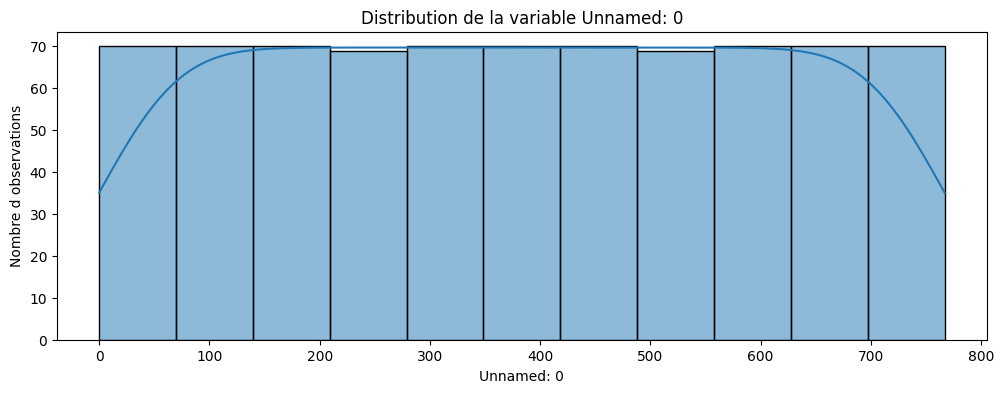

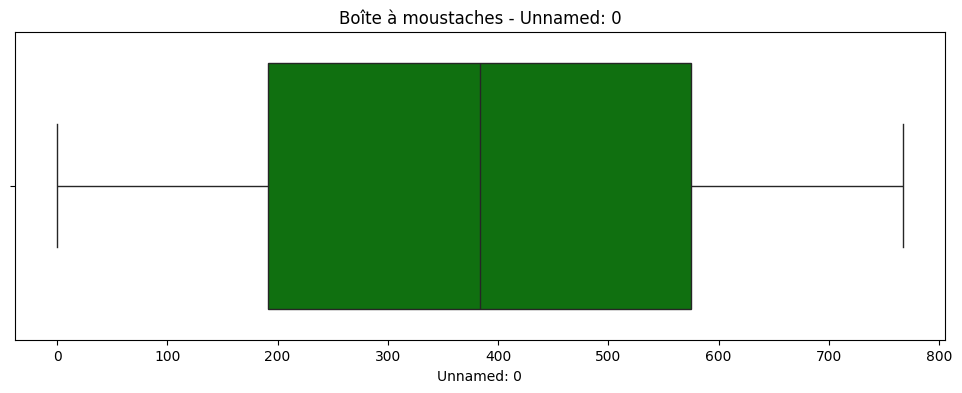

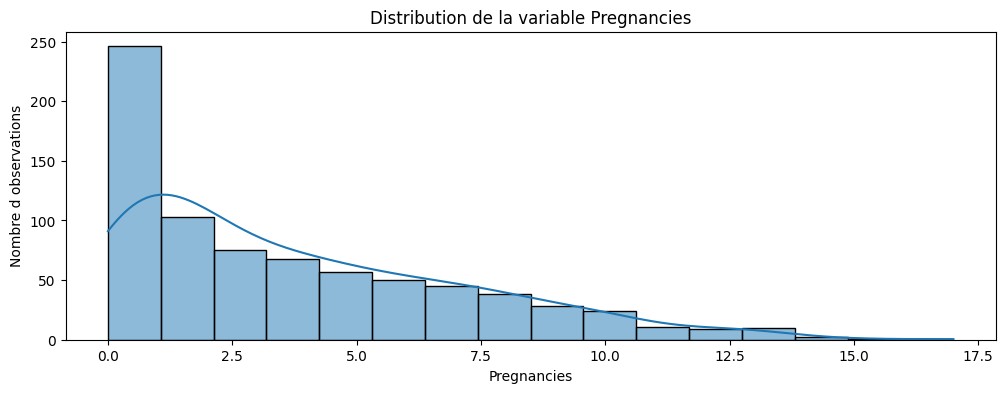

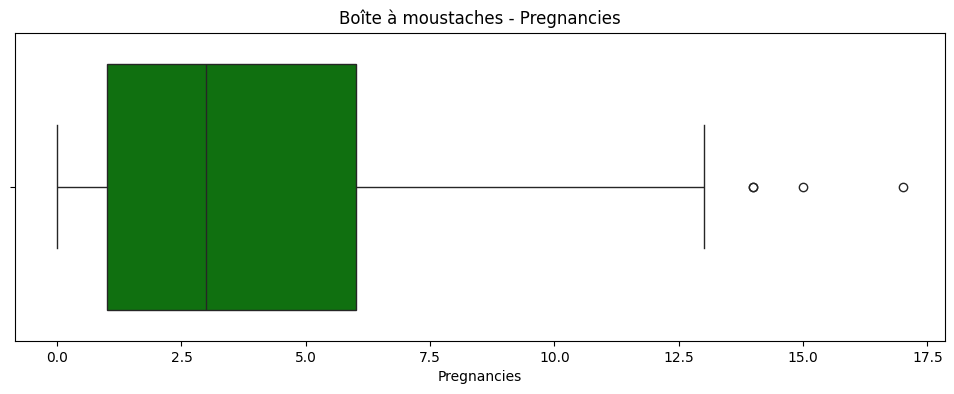

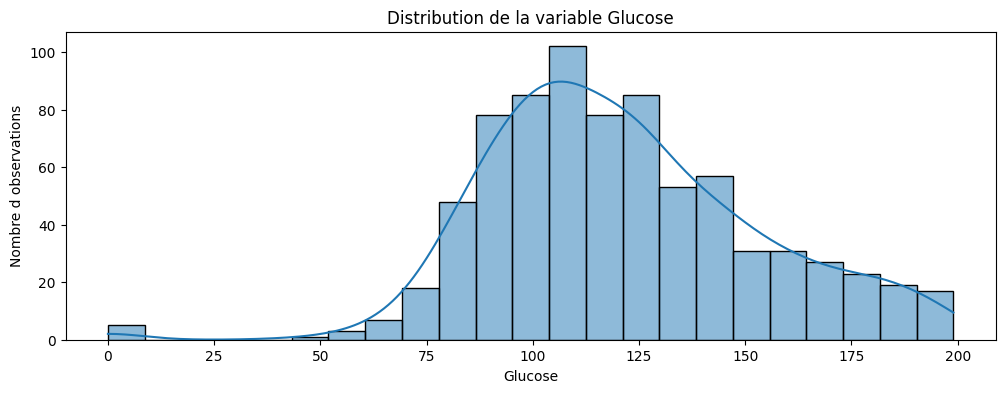

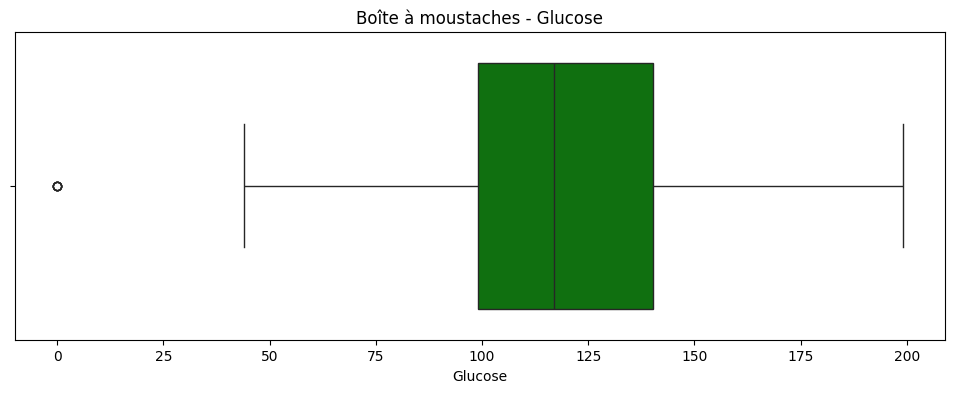

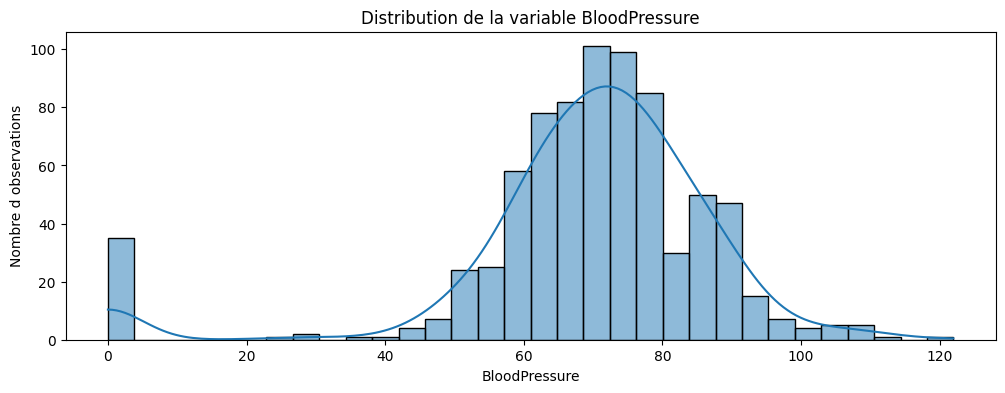

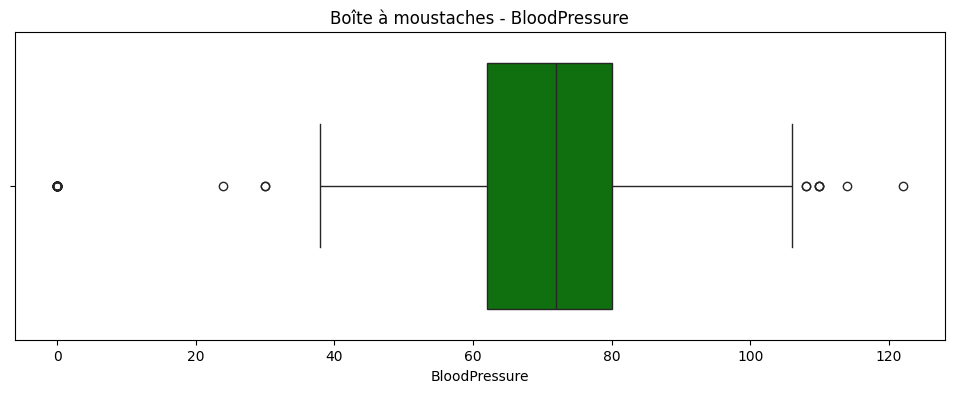

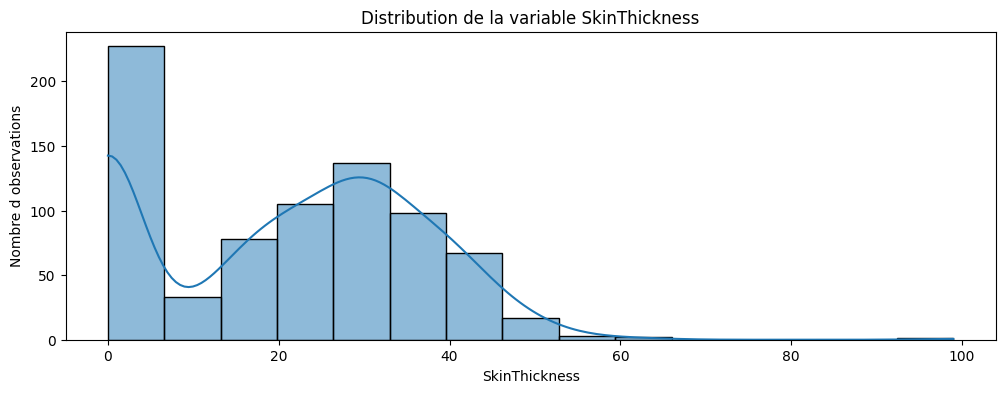

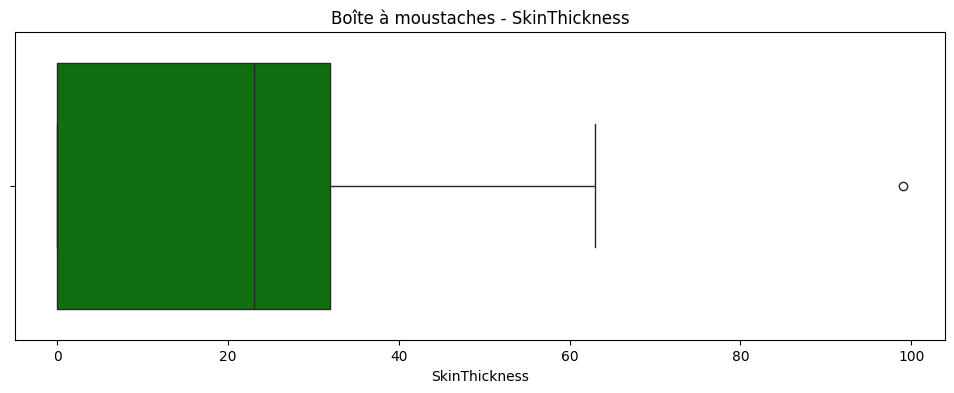

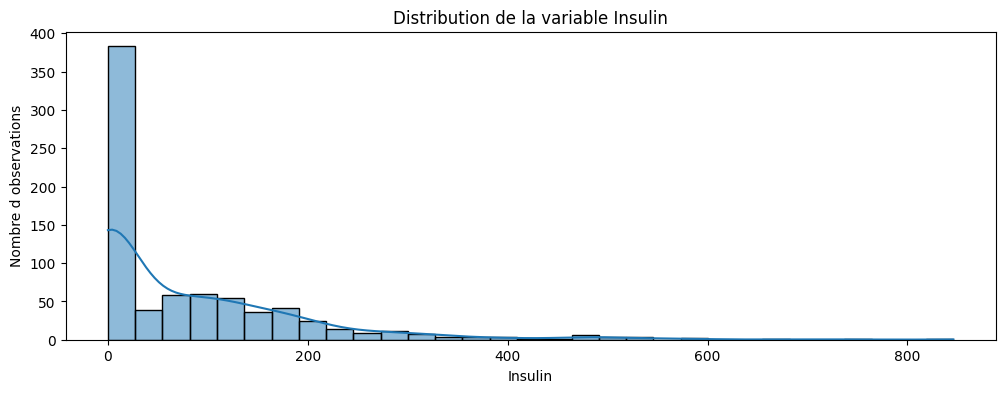

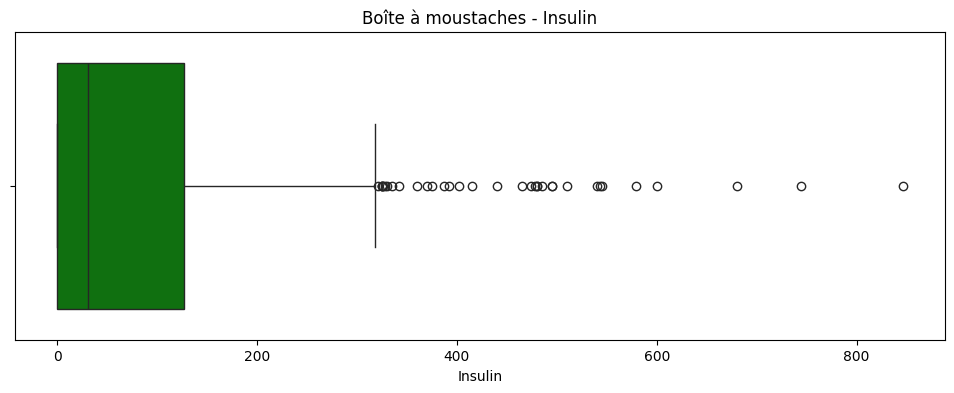

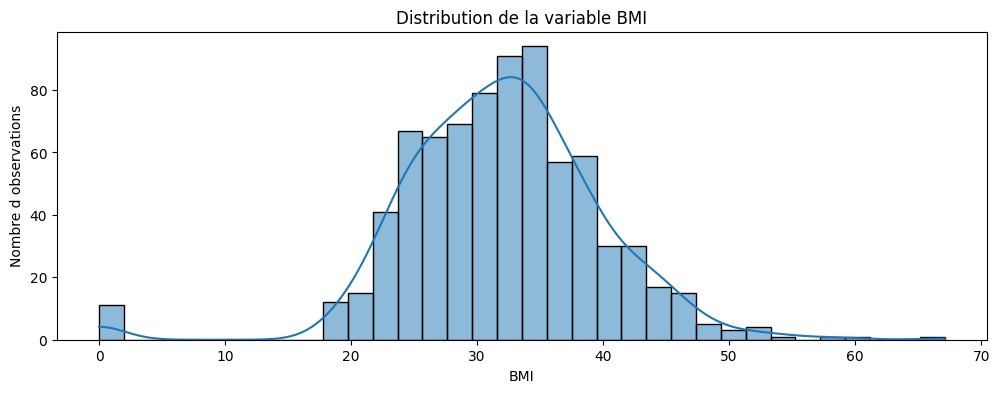

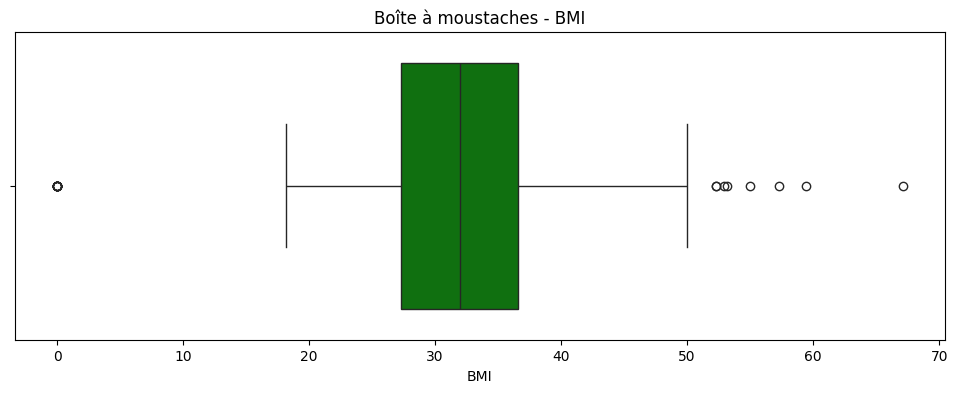

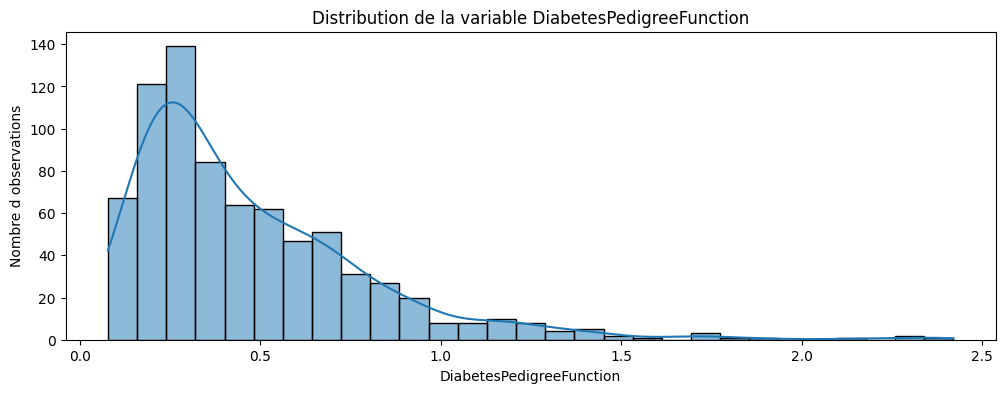

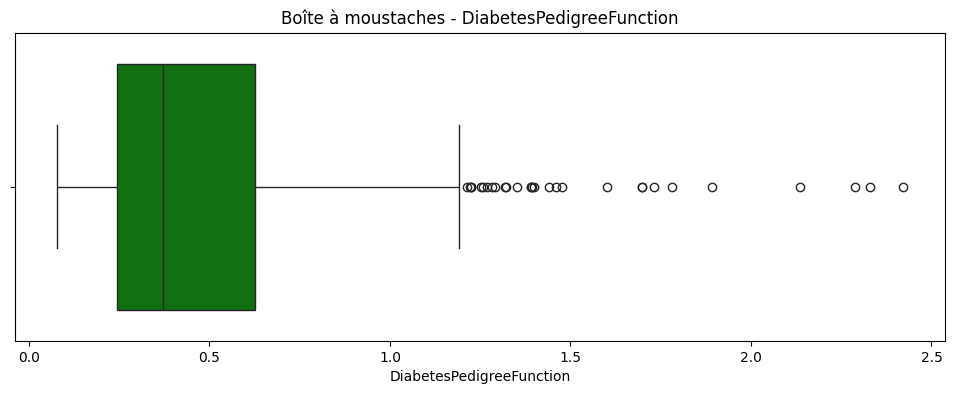

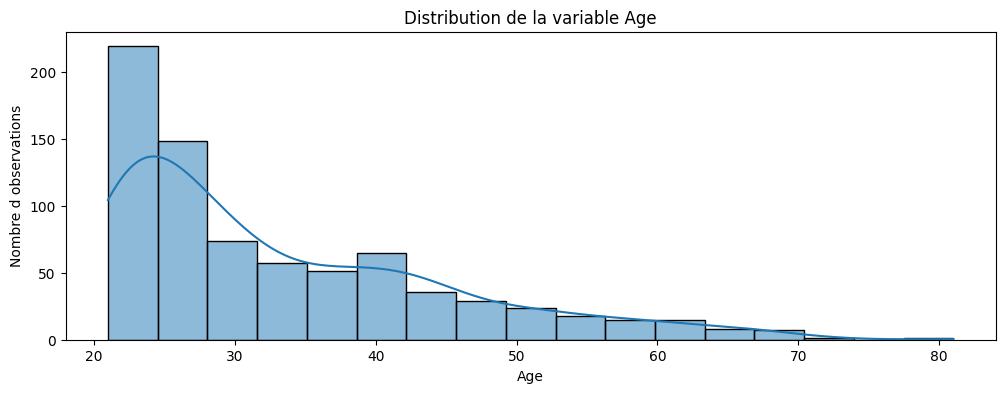

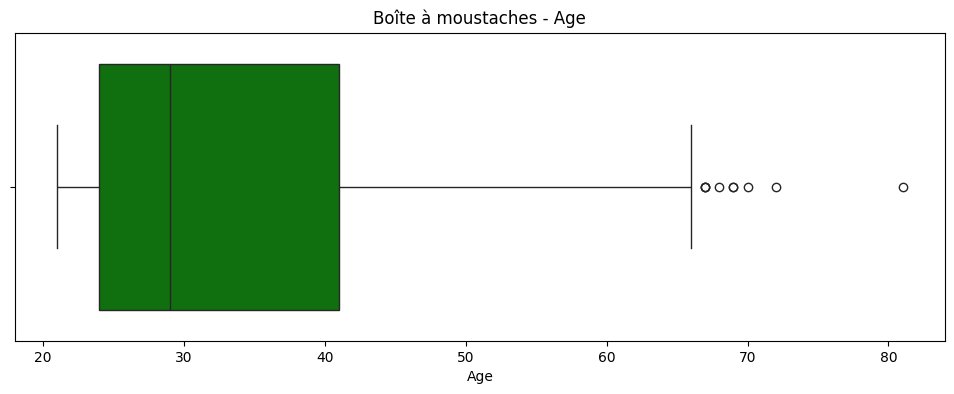

In [347]:
#Histogrammes, boxplots(seaborn, matplotlib)
for data in df:
    plt.figure(figsize=(12, 4))
    #trace un histogramme
    sns.histplot(df[data], kde=True)
    plt.title(f'Distribution de la variable {data}')
    plt.xlabel(data)
    plt.ylabel('Nombre d observations')
    #trace Boxplots
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df[data], color='green')
    plt.title(f'Boîte à moustaches - {data}')

    

<Figure size 1200x800 with 0 Axes>

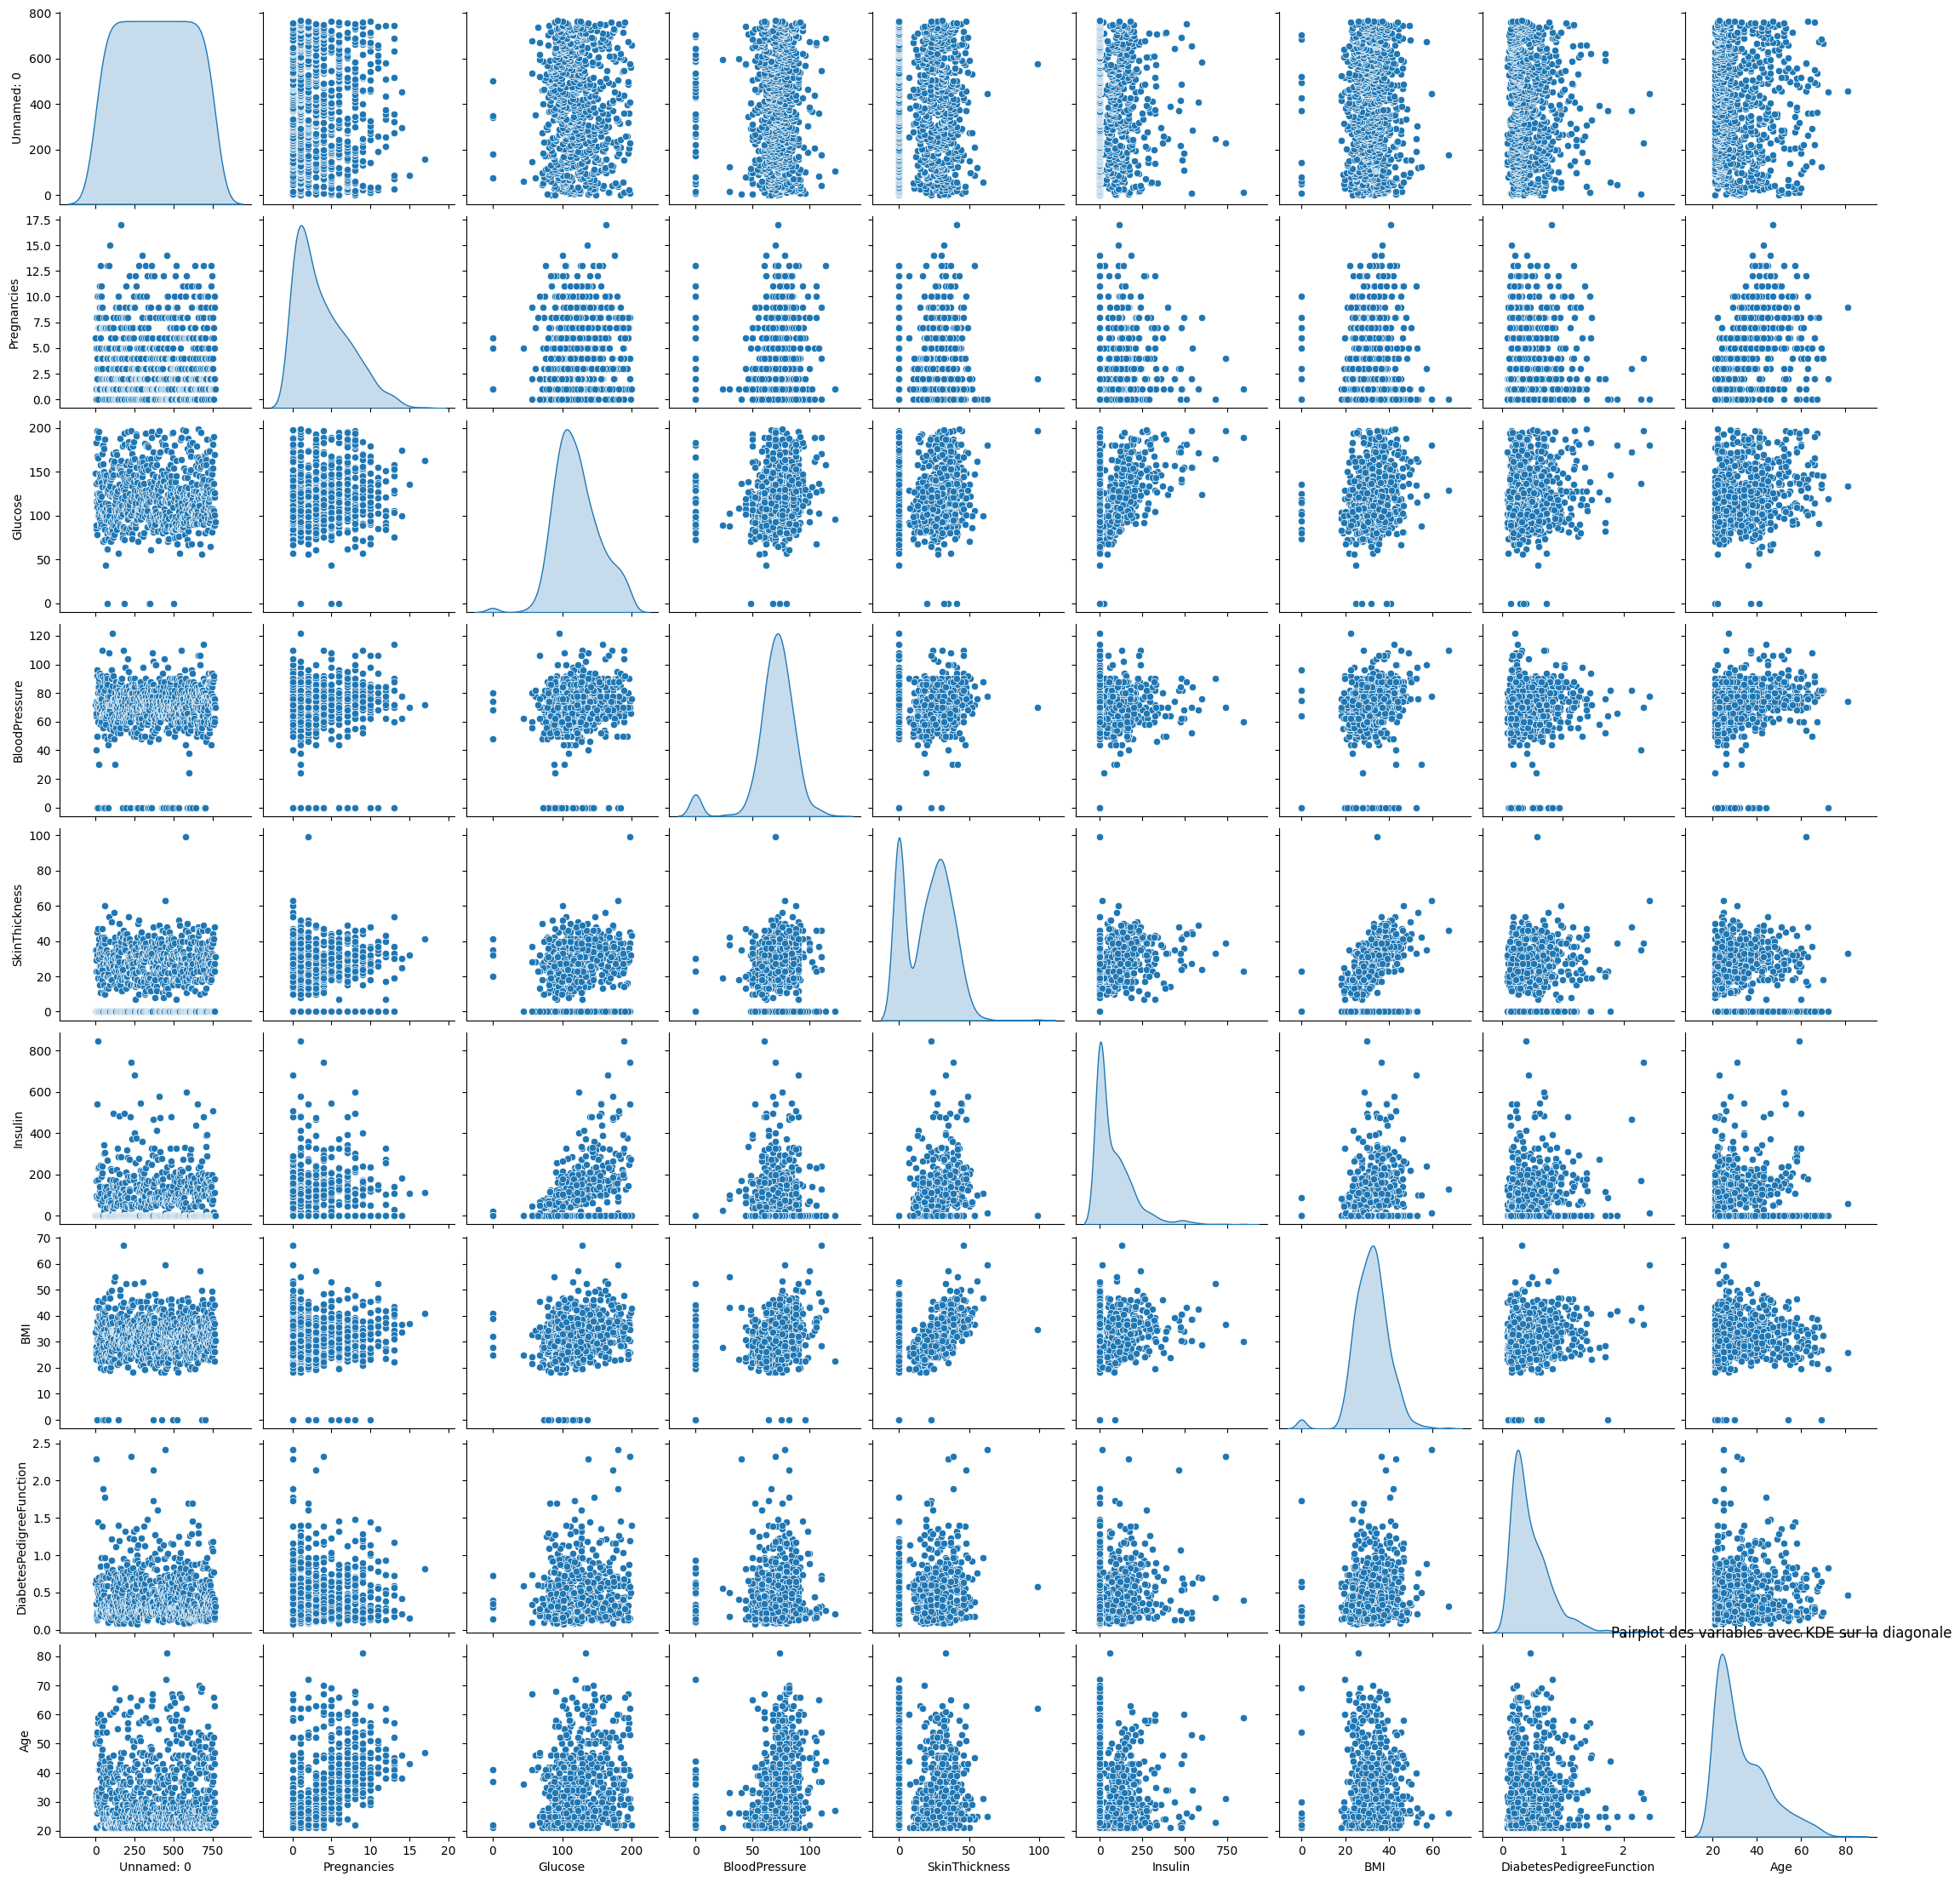

In [348]:
# Pairplots
plt.figure(figsize=(12, 8))
sns.pairplot(df, diag_kind='kde')
plt.title('Pairplot des variables avec KDE sur la diagonale')
plt.show()

## Matrice de corrélation 

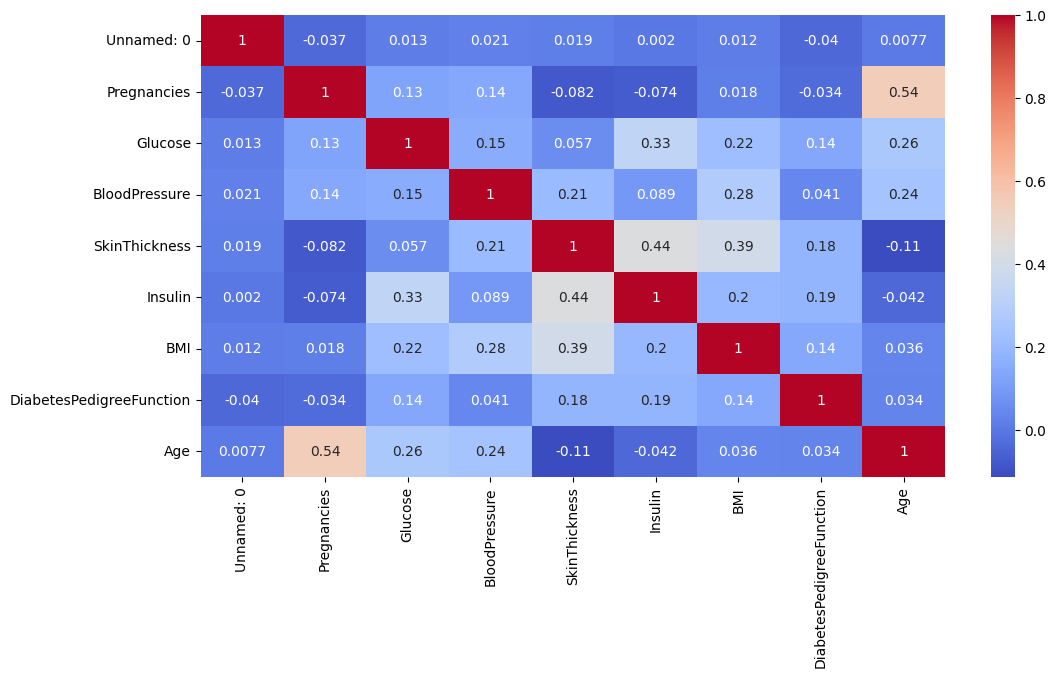

In [349]:
#Matrice de corrélation (sns.heatmap())
#les valeur entre -1 et 1
corr_matrix = df.corr()

# Visualisation : heatmap de corrélation
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Identifier les colonnes avec valeurs nulles

In [350]:
print('les colonnes avec les values manquantes sont :')
print(df.isnull().sum())

les colonnes avec les values manquantes sont :
Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


Appliquer une stratégie d’imputation (moyenne/médiane ou suppression)

In [351]:
print('pas des values manquantes dans le dataset donc on ne peut bas le changement des values manquantes')

pas des values manquantes dans le dataset donc on ne peut bas le changement des values manquantes


Détection des doublons

In [352]:
print("\nNombre de doublons :")
print(df.duplicated().sum())


Nombre de doublons :
0


# Visualisation des outliers (IQR)

In [353]:
# Détection des valeurs extrêmes pour la colonne 'price'
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    borne_min = q1 - 1.5 * iqr
    borne_max = q3 + 1.5 * iqr
    outliers = df[(df[col] < borne_min) | (df[col] > borne_max)]
    print(f"Colonne : {col}, Nombre d'outliers : {len(outliers)}")

Colonne : Unnamed: 0, Nombre d'outliers : 0
Colonne : Pregnancies, Nombre d'outliers : 4
Colonne : Glucose, Nombre d'outliers : 5
Colonne : BloodPressure, Nombre d'outliers : 45
Colonne : SkinThickness, Nombre d'outliers : 1
Colonne : Insulin, Nombre d'outliers : 34
Colonne : BMI, Nombre d'outliers : 19
Colonne : DiabetesPedigreeFunction, Nombre d'outliers : 29
Colonne : Age, Nombre d'outliers : 9


Supprimer les outliers

In [354]:
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols:  
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    min_val = q1 - 1.5 * iqr
    max_val = q3 + 1.5 * iqr
    df = df[(df[col] >= min_val) & (df[col] <= max_val)]
    print(f'Outliers supprimés pour {col}')

Outliers supprimés pour Pregnancies
Outliers supprimés pour Glucose
Outliers supprimés pour BloodPressure
Outliers supprimés pour SkinThickness
Outliers supprimés pour Insulin
Outliers supprimés pour BMI
Outliers supprimés pour DiabetesPedigreeFunction
Outliers supprimés pour Age


# Les graphe apres la supression des outliers 

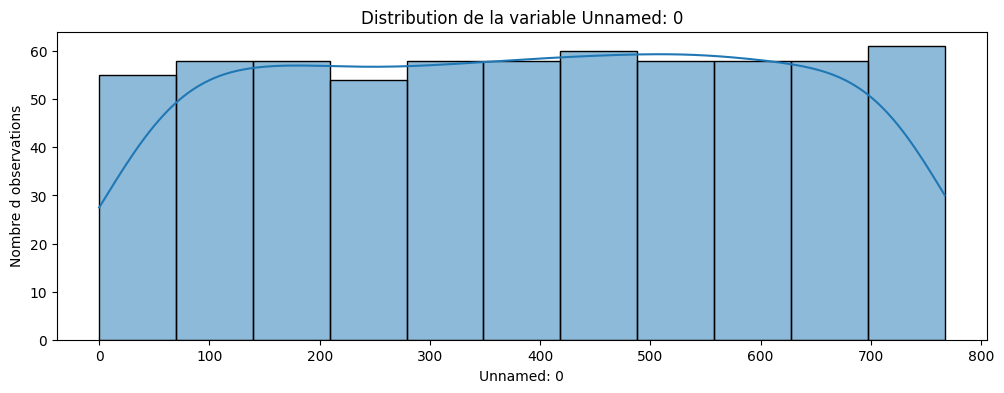

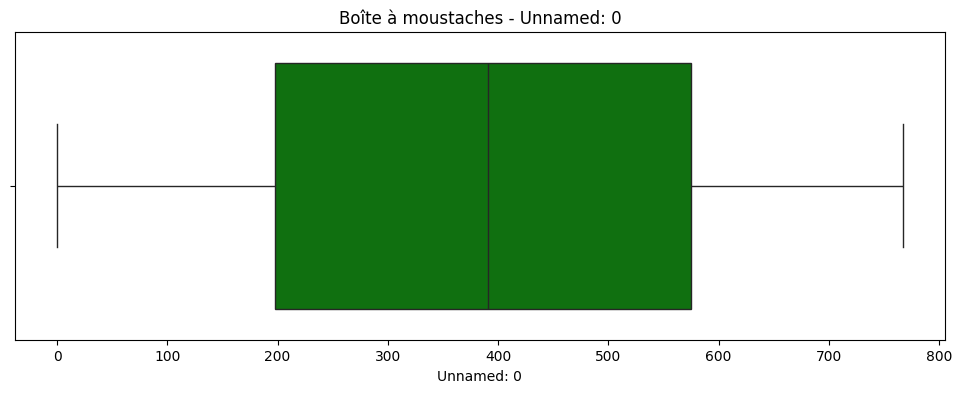

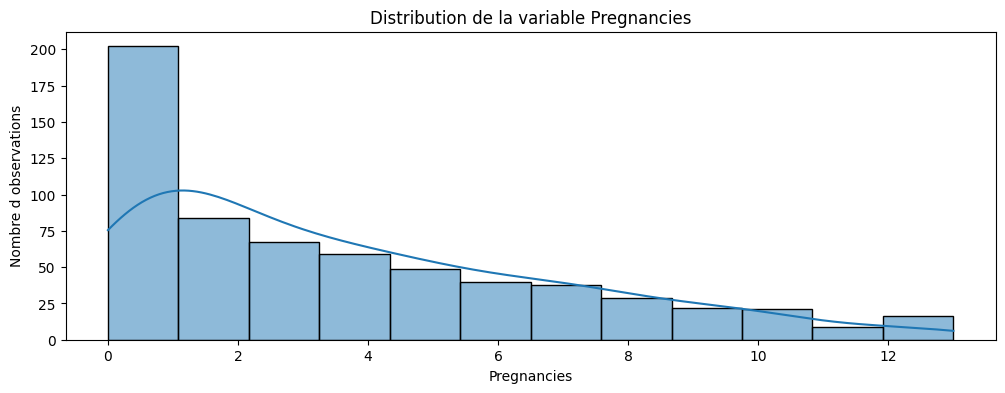

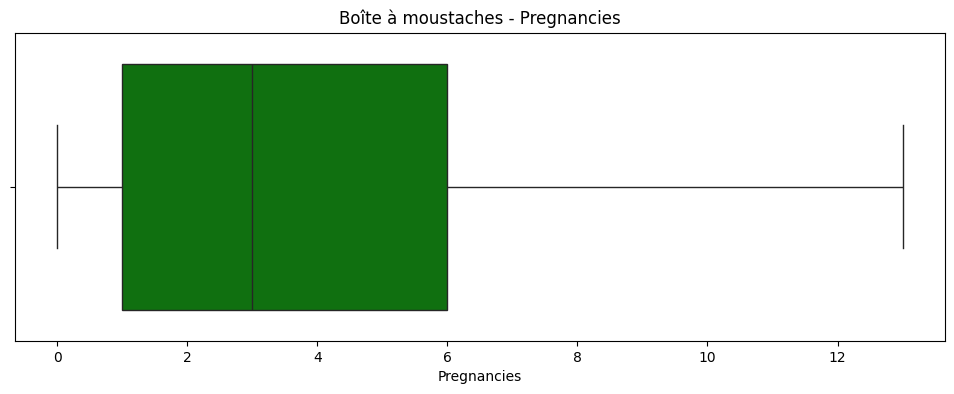

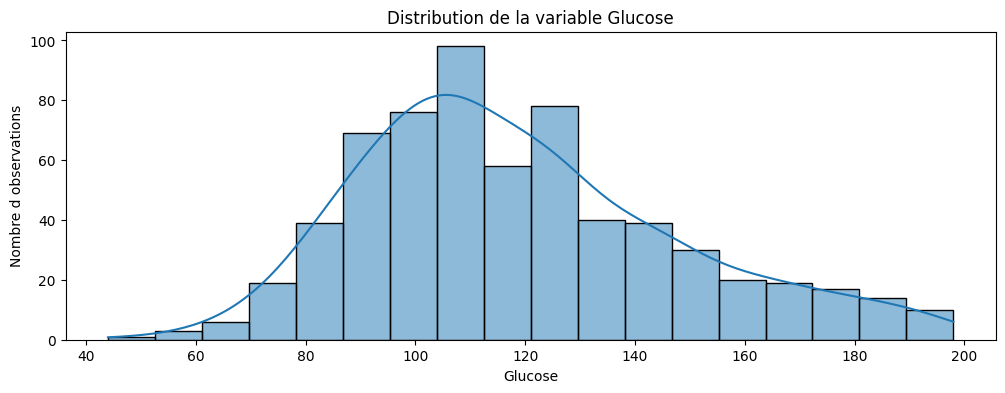

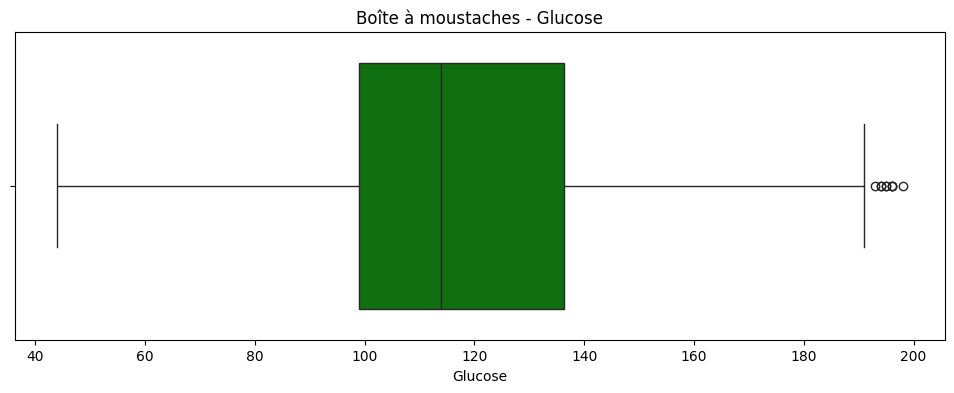

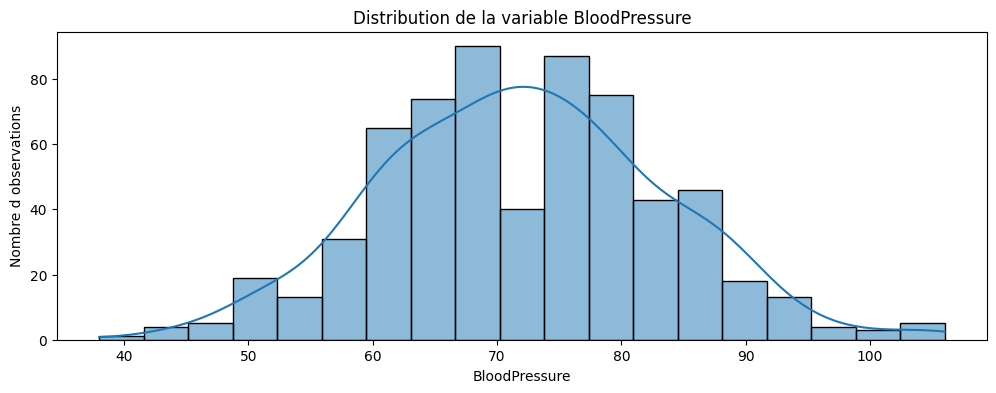

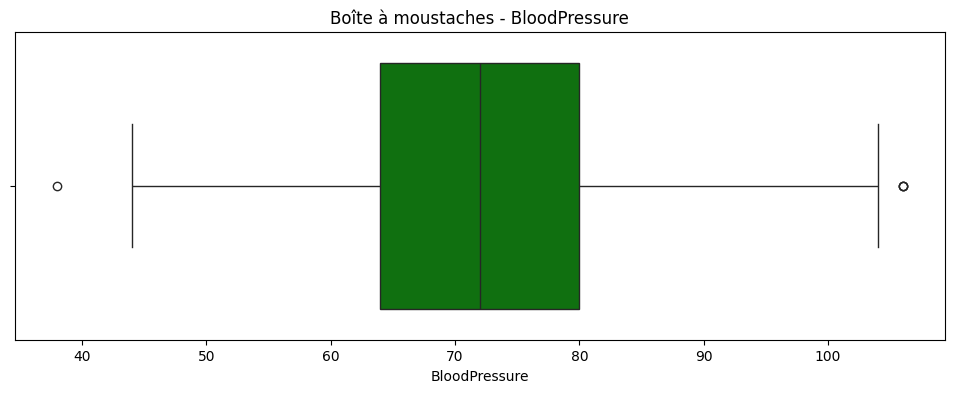

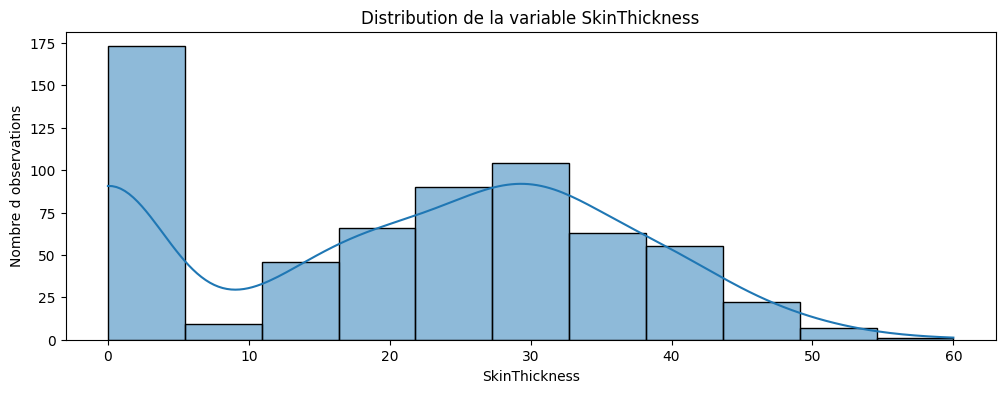

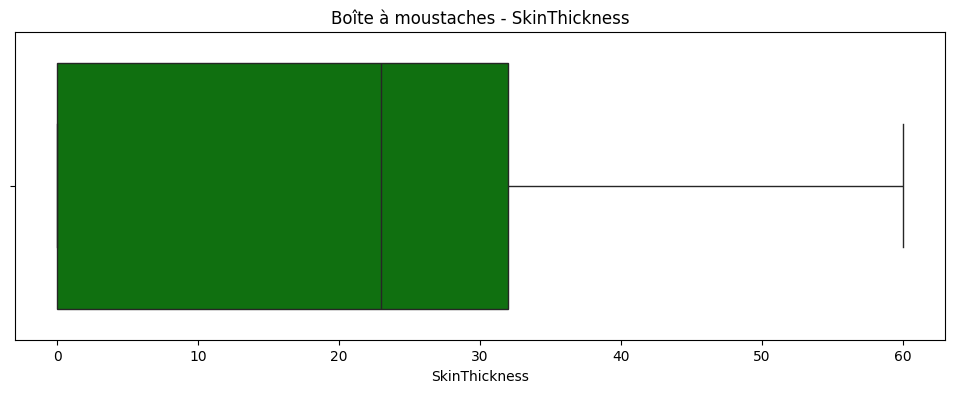

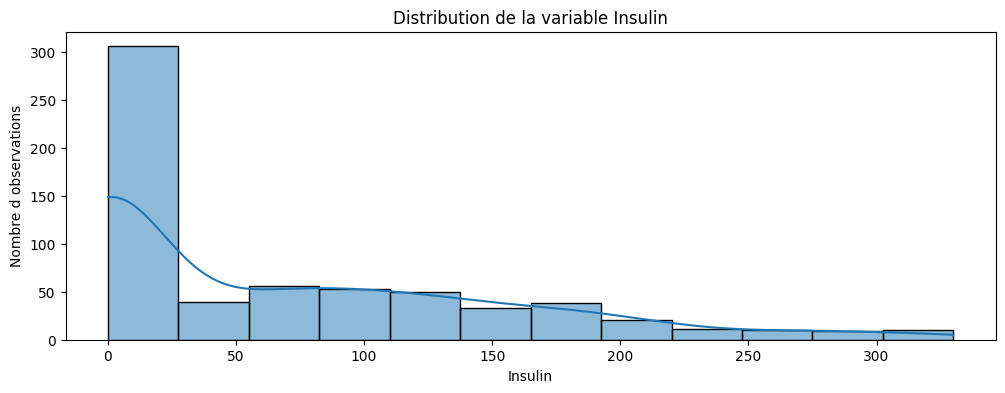

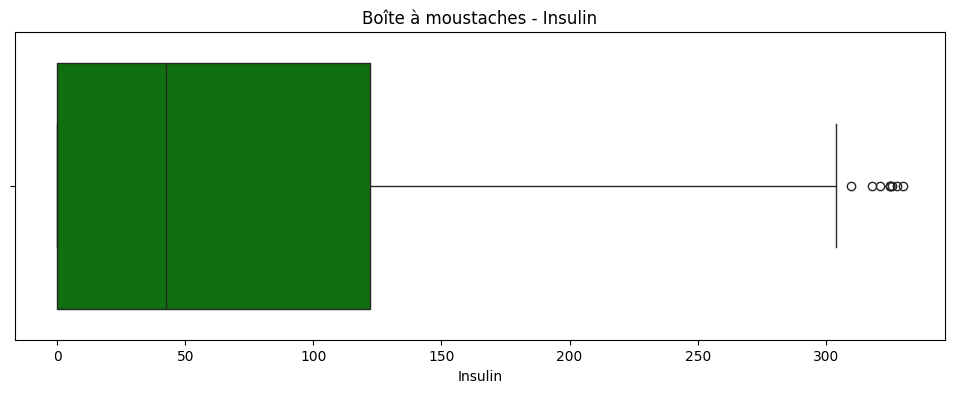

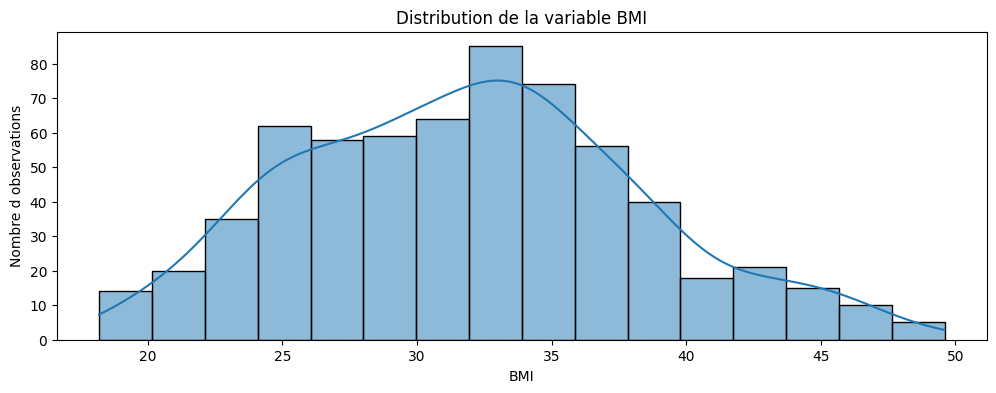

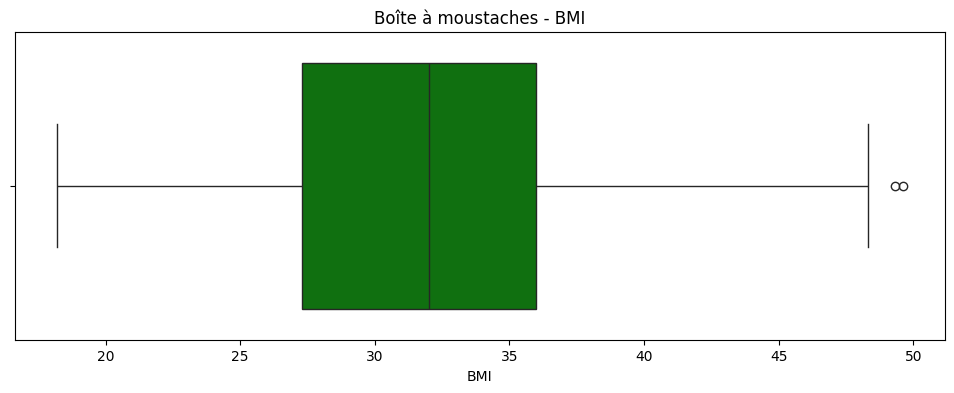

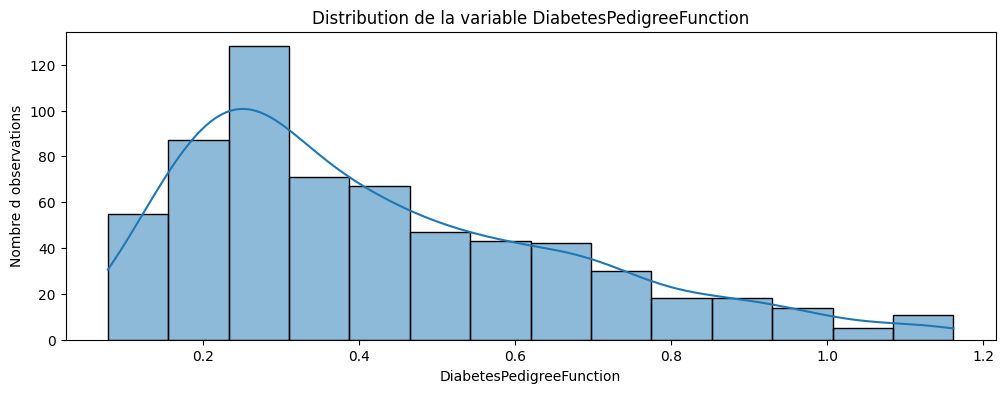

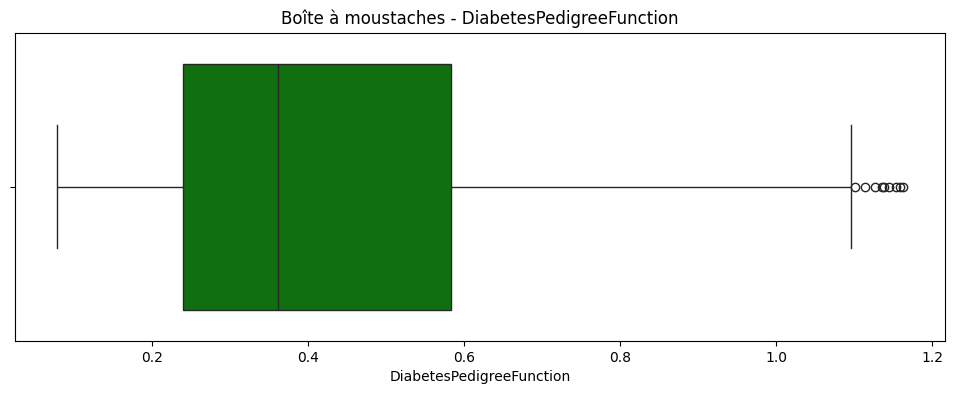

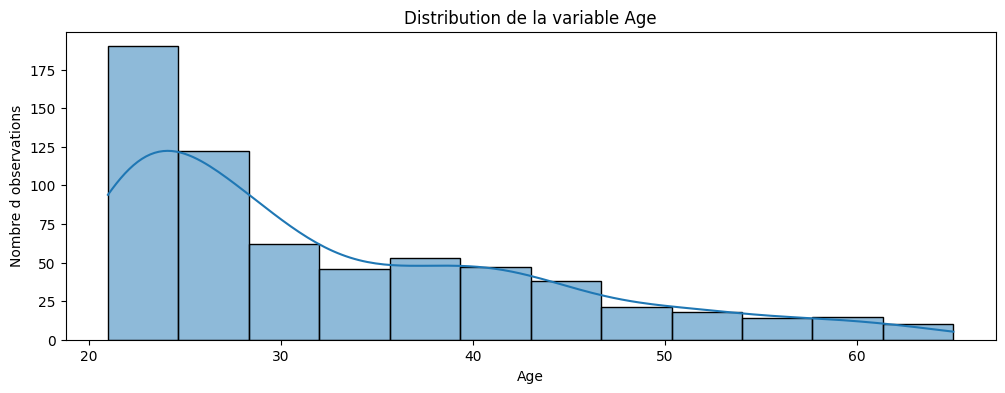

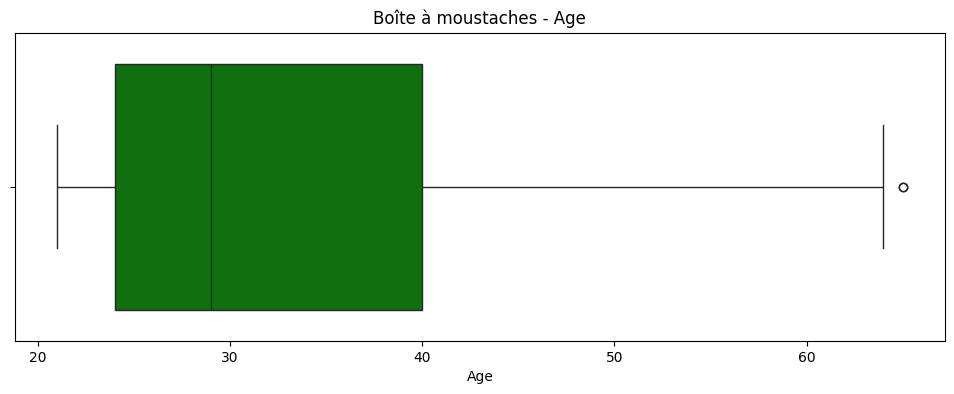

In [355]:
#Histogrammes, boxplots(seaborn, matplotlib)
for data in df:
    plt.figure(figsize=(12, 4))
    #trace un histogramme
    sns.histplot(df[data], kde=True)
    plt.title(f'Distribution de la variable {data}')
    plt.xlabel(data)
    plt.ylabel('Nombre d observations')
    #trace Boxplots
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df[data], color='green')
    plt.title(f'Boîte à moustaches - {data}')

    

# Visualiser les relations entre les variables pertinant 
- Les variables pertinentes : Glucose, BMI, Age, DiabetesPedigreeFunction.

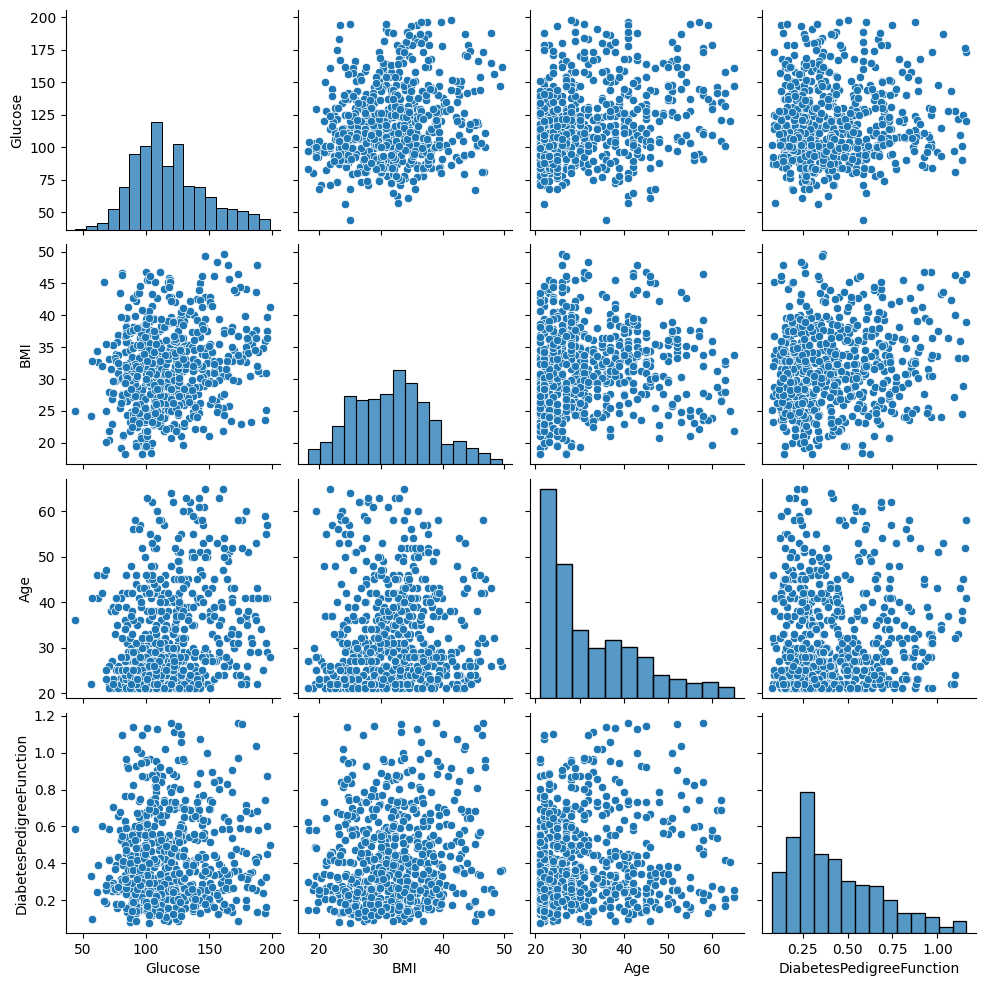

In [356]:

variable_pertine = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
#pairplot
sns.pairplot(df[variable_pertine])
plt.show()



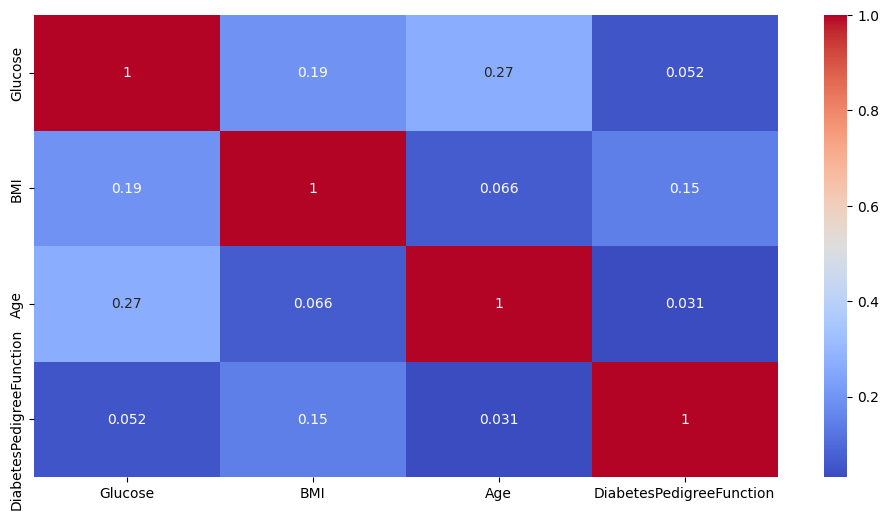

In [357]:
#Avec Matrice de corélation
corr_matrix = df[variable_pertine].corr()

# Visualisation : heatmap de corrélation
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# 📈​ La standarisation via StandardScaler 

#### 🧠 Qu’est-ce que la standardisation ?
- La standardisation est une transformation mathématique qui modifie les données pour qu’elles aient :
- une moyenne (mean) de 0
- un écart-type (standard deviation) de 1
- Elle est aussi appelée centrage-réduction.

#### 🎯 À quoi ça sert concrètement ?
- Mettre toutes les variables sur la même échelle
- Améliorer la performance de certains algorithmes
- Faciliter la convergence 

In [358]:
# Appliquer une technique de standardisation (ex. : StandardScaler) pour homogénéiser les échelles des variables numériques.

X = df[variable_pertine]

# Création du scaler
scaler = StandardScaler()

#fit() : calcule la moyenne et l’écart-type sur les données
#transform() : applique la transformation
#fit_transform() = fait les deux à la fois

X_scaled = scaler.fit_transform(X)
# Optionnel : convertir en DataFrame pour garder les noms des colonnes
X_scaled_df = pd.DataFrame(X_scaled, columns=variable_pertine)


# Afficher les premières lignes
print(X_scaled_df.head())


    Glucose       BMI       Age  DiabetesPedigreeFunction
0  1.005403  0.256438  1.604688                  0.819791
1 -1.168963 -0.840893 -0.143041                 -0.307223
2  2.213384 -1.358207 -0.051055                  1.003543
3 -1.030908 -0.605751 -1.062898                 -1.058566
4 -0.099037 -0.997655 -0.235026                 -0.919731


# Entraînement des modèles de clustering
* Partie 1: Clustering avec K-Means:

### Qu'est-ce que le Clustering ?

Le clustering est une technique d'apprentissage non supervisé qui regroupe des données similaires en clusters,

* le nombre optimal de clusters (Méthode du coude)

In [359]:

inertias = []                                  # Liste pour stocker Somme des Erreurs Carrées  les valeurs d'inertie (SSE) pour chaque k
k_range = range(1, 11)                         # Plage des valeurs de k à tester (de 1 à 10)

# Boucle pour tester différents nombres de clusters k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Initialiser le modèle KMeans avec k clusters
    kmeans.fit(X_scaled)                            # Apprendre à partir des données standardisées
    inertias.append(kmeans.inertia_)                # Sauvegarder l'inertie (somme des distances intra-cluster)




* Tracage de la courbe

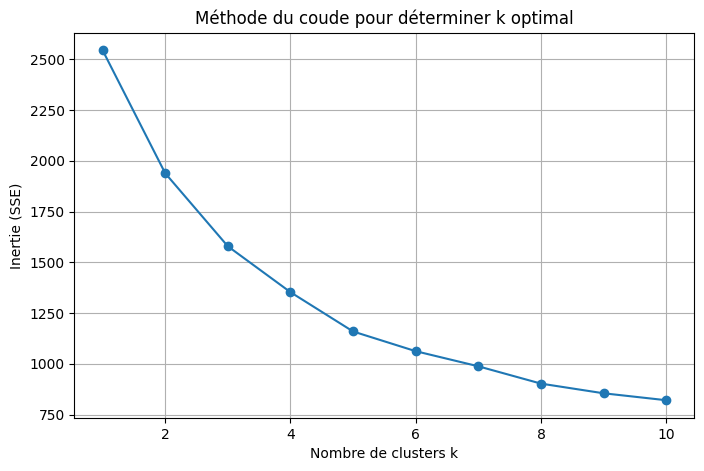

In [360]:
#Visualiser la courbe d’inertie pour appuyer le choix de k

plt.figure(figsize=(8,5))                           # Définir la taille de la figure
plt.plot(k_range, inertias, marker='o')             # Tracer la courbe inertie vs. k avec des marqueurs
plt.title("Méthode du coude pour déterminer k optimal")  # Titre du graphique
plt.xlabel("Nombre de clusters k")                  # Étiquette de l'axe X
plt.ylabel("Inertie (SSE)")                         # Étiquette de l'axe Y
plt.grid(True)                                      # Afficher une grille pour faciliter la lecture
plt.show()                                          # Afficher le graphique

* Trouver automatiquement le coude

In [361]:
# Trouver automatiquement le coude (valeur optimale de k)
kl = KneeLocator(k_range, inertias, curve='convex', direction='decreasing')  
# KneeLocator analyse la courbe pour détecter le "coude" où l'inertie diminue moins vite
print(f"Nombre optimal de clusters : {kl.elbow}")  

Nombre optimal de clusters : 5


* Entraîner un modèle K-Means avec le nombre de clusters choisi. cest 5

In [362]:
# Appliquer KMeans avec le nombre optimal de clusters trouvé
k_optimal = kl.elbow # Récupérer la valeur optimale de k

kmeans = KMeans(n_clusters=k_optimal, random_state=42)  



* Ajouter une colonne Cluster au dataset indiquant le groupe assigné à chaque individu.

In [363]:
df['Cluster'] = kmeans.fit_predict(X_scaled)


* Visualiser la répartition des observations par cluster et interpréter les résultats.

*  Graphe (Glucose - BMI )

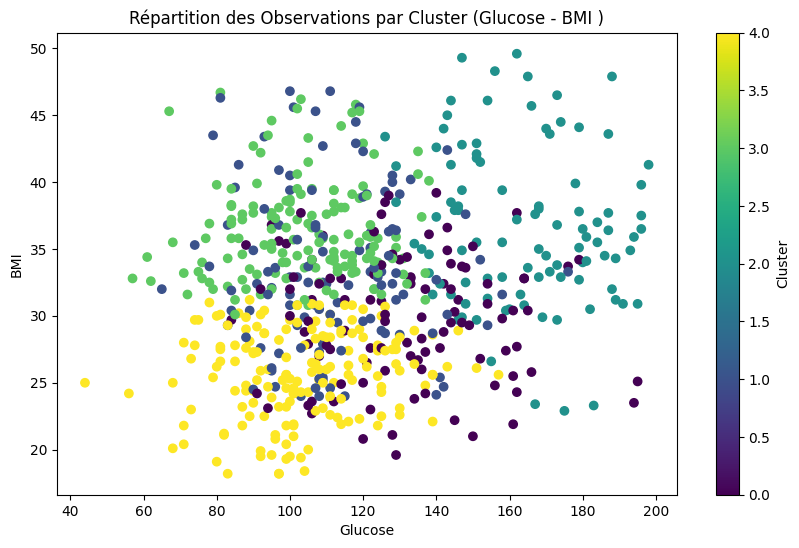

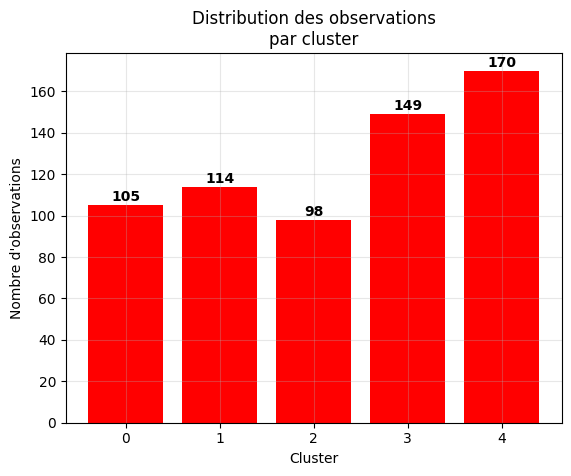

In [364]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Glucose'], df['BMI'] , c=df['Cluster'], cmap='viridis')

plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Répartition des Observations par Cluster (Glucose - BMI )')
plt.colorbar(label='Cluster')
plt.show()

# Graphique 3: Distribution des clusters

cluster_counts = pd.Series(df['Cluster']).value_counts().sort_index()
bars = plt.bar(cluster_counts.index, cluster_counts.values, color="red")
plt.xlabel('Cluster')
plt.ylabel('Nombre d\'observations')
plt.title('Distribution des observations\npar cluster')
plt.grid(True, alpha=0.3)

# Ajouter les valeurs sur les barres
for bar, count in zip(bars, cluster_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             str(count), ha='center', va='bottom', fontweight='bold')

* Graphique 2: Age vs Glucose  

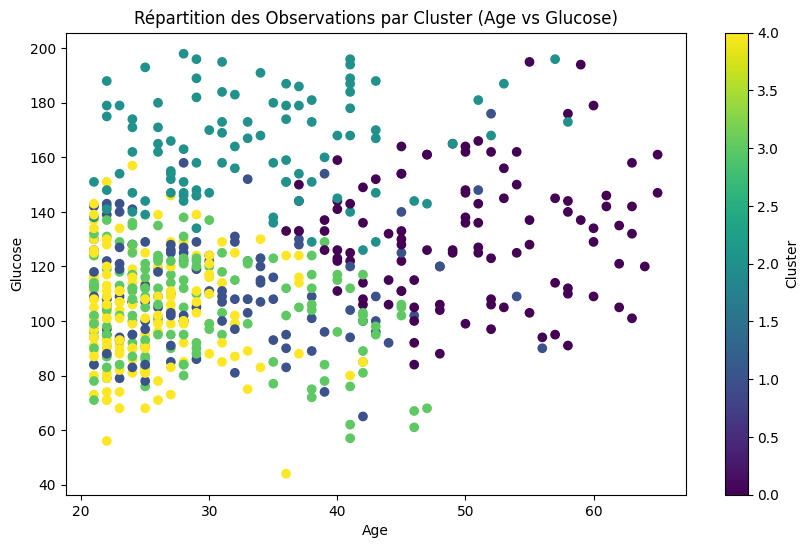

In [289]:

plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Glucose'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Répartition des Observations par Cluster (Age vs Glucose)')
plt.colorbar(label='Cluster')
plt.show()

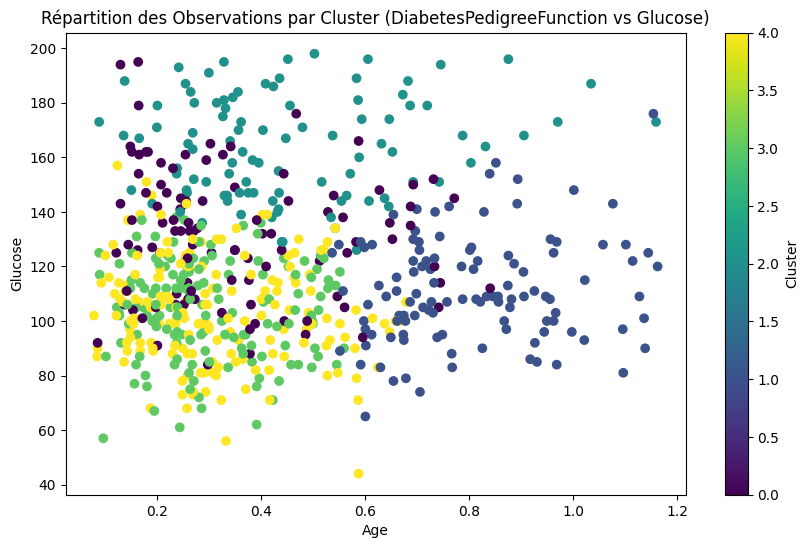

In [366]:

plt.figure(figsize=(10, 6))
plt.scatter(df['DiabetesPedigreeFunction'], df['Glucose'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Répartition des Observations par Cluster (DiabetesPedigreeFunction vs Glucose)')
plt.colorbar(label='Cluster')
plt.show()


* Interprétation des résultat 

In [291]:
# INTERPRÉTATION SIMPLE
print("\n=== INTERPRÉTATION ===")
for cluster in range(k_optimal):
    data_cluster = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster + 1} ({len(data_cluster)} personnes):")
    print(f"  Glucose moyen: {data_cluster['Glucose'].mean():.2f}")
    print(f"  BMI moyen: {data_cluster['BMI'].mean():.2f}")
    print(f"  Age moyen: {data_cluster['Age'].mean():.2f}")
    print(f"  DiabetesPedigreeFunction moyen: {data_cluster['DiabetesPedigreeFunction'].mean():.2f}")

k_optimal


=== INTERPRÉTATION ===

Cluster 1 (105 personnes):
  Glucose moyen: 131.14
  BMI moyen: 29.88
  Age moyen: 50.07
  DiabetesPedigreeFunction moyen: 0.35

Cluster 2 (114 personnes):
  Glucose moyen: 111.50
  BMI moyen: 33.54
  Age moyen: 30.80
  DiabetesPedigreeFunction moyen: 0.81

Cluster 3 (98 personnes):
  Glucose moyen: 163.94
  BMI moyen: 36.72
  Age moyen: 33.39
  DiabetesPedigreeFunction moyen: 0.45

Cluster 4 (149 personnes):
  Glucose moyen: 103.90
  BMI moyen: 36.29
  Age moyen: 29.28
  DiabetesPedigreeFunction moyen: 0.30

Cluster 5 (170 personnes):
  Glucose moyen: 103.37
  BMI moyen: 25.66
  Age moyen: 25.31
  DiabetesPedigreeFunction moyen: 0.32


np.int64(5)

# Réduction de dimensionnalité pour visualisation:

#### Analyse en Composantes Principales : ACP
L'ACP est une technique de réduction de dimensionnalité qui permet de transformer des données avec beaucoup de variables (dimensions) en un nombre plus petit de dimensions tout en conservant le maximum d'information importante.
#### Pourquoi utiliser l'ACP ?
* Visualisation : Permet d'afficher des données multi-dimensionnelles en 2D ou 3D
* Réduction du bruit : Élimine les dimensions moins importantes
* Performance : Accélère les algorithmes en réduisant le n

##  Etape 1: APPLICATION DE L'ACP (PCA)

In [368]:

# Initialiser l'ACP pour réduire à 2 dimensions
pca = PCA(n_components=2, random_state=42)


X_pca = pca.fit_transform(X_scaled)

#variance = à quel point les valeurs sont éloignées de la moyenne.
#La variance expliquée par chaque composante = combien d’information elle capture.
#La variance totale conservée = somme des variances expliquées des composantes qu’on garde.

# Afficher des informations sur l'ACP
print(f"Variance expliquée par chaque composante: {pca.explained_variance_ratio_}")

print(f"Variance totale conservée: {pca.explained_variance_ratio_.sum():.3f} ({pca.explained_variance_ratio_.sum()*100:.1f}%)")

print(f"Dimensions originales: {X_scaled.shape[1]}  Nouvelles dimensions: {X_pca.shape[1]}")
 

# Créer un DataFrame avec les nouvelles dimensions pour faciliter la manipulation
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca
#X_scaled_df
#print(pca.components_)
# remarque :PC1 et PC2 ne sont pas une seule variable comme Glucose ou Age, ce sont des mélanges pondérés des 4 variables.

Variance expliquée par chaque composante: [0.35089571 0.2618117 ]
Variance totale conservée: 0.613 (61.3%)
Dimensions originales: 4  Nouvelles dimensions: 2


PC1       PC2
0    1.839580 -0.369366
1   -1.315408 -0.186254
2    0.984952 -0.441877
3   -1.818953 -0.207224
4   -0.958132 -0.934887
..        ...       ...
631  0.831575 -1.883096
632  0.071283  0.292454
633 -0.749259 -0.814340
634  0.605522 -1.066666
635 -1.274934  0.247494

[636 rows x 2 columns]

### Etap 2: MÉTHODE DU COUDE SUR DONNÉES ACP

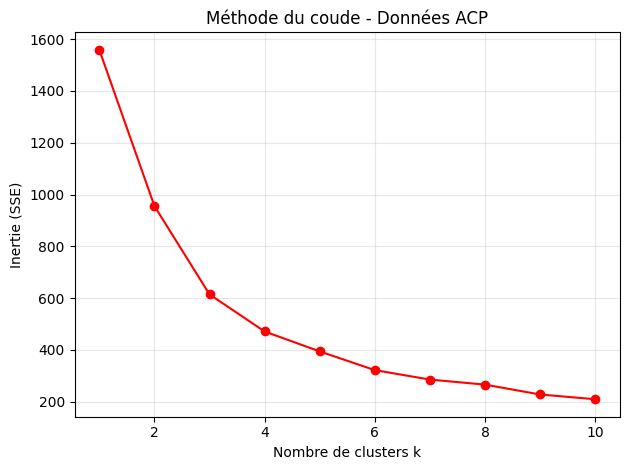

Nombre optimal de clusters (données ACP) : 3


In [369]:

inertias_pca = []                              


for k in k_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)  
    kmeans_pca.fit(X_pca)                               
    inertias_pca.append(kmeans_pca.inertia_)            



# Visualiser la courbe d'inertie pour les données ACP

plt.plot(k_range, inertias_pca, marker='o', color='red')
plt.title("Méthode du coude - Données ACP")
plt.xlabel("Nombre de clusters k")
plt.ylabel("Inertie (SSE)")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Trouver le coude optimal pour les données ACP
kl_pca = KneeLocator(k_range, inertias_pca, curve='convex', direction='decreasing')
print(f"Nombre optimal de clusters (données ACP) : {kl_pca.elbow}")


## Etape 3: CLUSTERING FINAL AVEC ACP

In [370]:
#Utiliser le k optimal trouvé avec l'ACP
k_optimal_pca = kl_pca.elbow


# Appliquer KMeans avec le nombre optimal de clusters sur les données ACP
kmeans_pca = KMeans(n_clusters=k_optimal_pca, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# Ajouter les clusters au DataFrame original ET au DataFrame ACP
df['Cluster_PCA'] = clusters_pca
df_pca['Cluster'] = clusters_pca

df_pca


PC1       PC2  Cluster
0    1.839580 -0.369366        0
1   -1.315408 -0.186254        1
2    0.984952 -0.441877        0
3   -1.818953 -0.207224        1
4   -0.958132 -0.934887        1
..        ...       ...      ...
631  0.831575 -1.883096        0
632  0.071283  0.292454        2
633 -0.749259 -0.814340        1
634  0.605522 -1.066666        0
635 -1.274934  0.247494        1

[636 rows x 3 columns]

### Etape 4: VISUALISATIONS COMPARATIVES

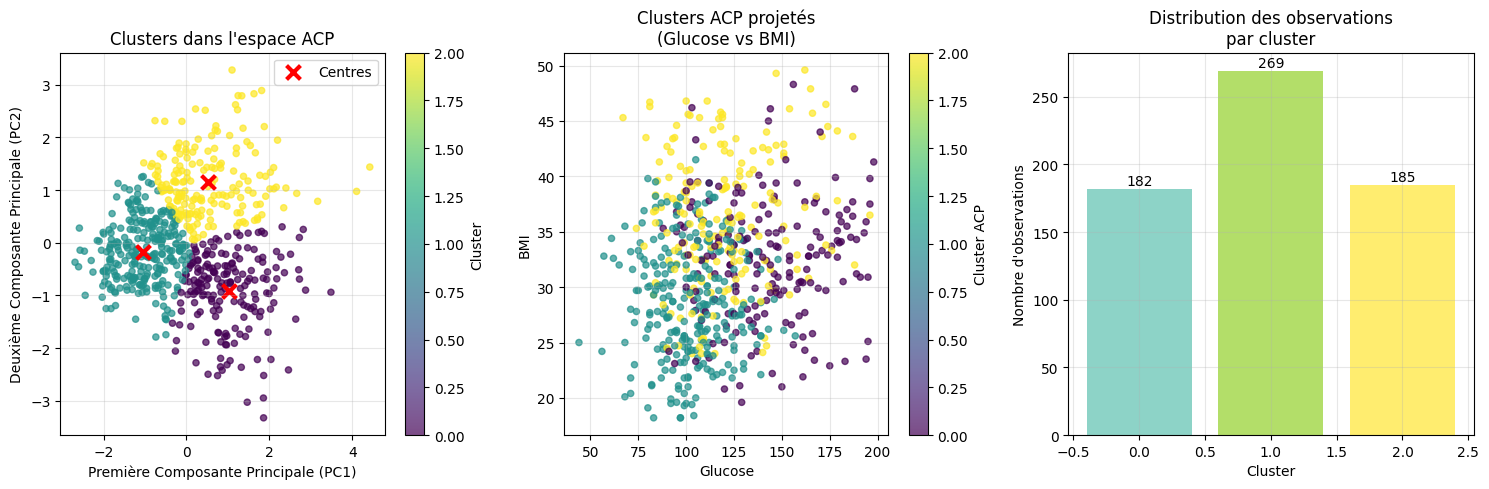

In [371]:
# Configuration pour de beaux graphiques

colors = plt.cm.Set3(np.linspace(0, 1, k_optimal_pca))
plt.figure(figsize=(15, 5))


# Graphique 1: Clusters sur les composantes principales
plt.subplot(1, 3, 1)
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.7, s=20)
plt.xlabel('Première Composante Principale (PC1)')
plt.ylabel('Deuxième Composante Principale (PC2)')
plt.title('Clusters dans l\'espace ACP')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)

# Ajouter les centres des clusters
centers = kmeans_pca.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100, linewidths=3, label='Centres')
plt.legend()

# Graphique 2: Comparaison avec visualisation originale (Glucose vs BMI)
plt.subplot(1, 3, 2)

plt.scatter(df['Glucose'], df['BMI'], c=df['Cluster_PCA'], cmap='viridis', alpha=0.7, s=20)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Clusters ACP projetés\n(Glucose vs BMI)')
plt.colorbar(label='Cluster ACP')
plt.grid(True, alpha=0.3)

# Graphique 3: Distribution des clusters
plt.subplot(1, 3, 3)
cluster_counts = pd.Series(clusters_pca).value_counts().sort_index()

bars = plt.bar(cluster_counts.index, cluster_counts.values, color=colors[:len(cluster_counts)])

plt.xlabel('Cluster')
plt.ylabel('Nombre d\'observations')
plt.title('Distribution des observations\npar cluster')
plt.grid(True, alpha=0.3)

# Ajouter les valeurs sur les barres
for bar, count in zip(bars, cluster_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Etape 5 : ANALYSE DES RÉSULTATS

In [372]:

# Statistiques par cluster
print("Statistiques des clusters:")
print("-" * 30)
for i in range(k_optimal_pca):
    cluster_data = df[df['Cluster_PCA'] == i]
    print(f"Cluster {i+1}: {len(cluster_data)} observations ({len(cluster_data)/len(df)*100:.1f}%)")

# Comparaison des inerties
print(f"\nComparaison des méthodes:")
print(f"Inertie finale (données originales): {inertias[k_optimal_pca-1 if k_optimal_pca <= len(inertias) else -1]:.2f}")
print(f"Inertie finale (données ACP): {inertias_pca[k_optimal_pca-1]:.2f}")

# Information sur la réduction de dimensionnalité
print(f"\nInformation ACP:")
print(f"Perte d'information: {(1-pca.explained_variance_ratio_.sum())*100:.1f}%")
print(f"Information conservée: {pca.explained_variance_ratio_.sum()*100:.1f}%")

# Afficher les composantes principales (quelles variables originales sont importantes)
if hasattr(pca, 'feature_names_in_'):
    feature_names = pca.feature_names_in_
else:
    feature_names = [f'Variable_{i}' for i in range(pca.components_.shape[1])]

print(f"\nContribution des variables aux composantes principales:")
components_df = pd.DataFrame(pca.components_.T, 
                           columns=['PC1', 'PC2'], 
                           index=feature_names)
print(components_df.round(3))

Statistiques des clusters:
------------------------------
Cluster 1: 182 observations (28.6%)
Cluster 2: 269 observations (42.3%)
Cluster 3: 185 observations (29.1%)

Comparaison des méthodes:
Inertie finale (données originales): 1578.87
Inertie finale (données ACP): 614.38

Information ACP:
Perte d'information: 38.7%
Information conservée: 61.3%

Contribution des variables aux composantes principales:
              PC1    PC2
Variable_0  0.625 -0.273
Variable_1  0.497  0.424
Variable_2  0.521 -0.490
Variable_3  0.303  0.711


## Analyse des clusters:

In [373]:
# Seuils critiques
GLUCOSE_THRESHOLD = 126
BMI_THRESHOLD = 30
DPF_THRESHOLD = 0.5

# Variables à analyser (adapter selon vos noms de colonnes)
variables_critiques = ['Glucose', 'BMI', 'DiabetesPedigreeFunction']


* Calculer les moyennes par cluster

In [374]:

cluster_means = df.groupby('Cluster')[variables_critiques].mean()
print("Moyennes des caractéristiques par cluster:")
print(cluster_means.round(2))

Moyennes des caractéristiques par cluster:
         Glucose    BMI  DiabetesPedigreeFunction
Cluster                                          
0         131.14  29.88                      0.35
1         111.50  33.54                      0.81
2         163.94  36.72                      0.45
3         103.90  36.29                      0.30
4         103.37  25.66                      0.32


* Compter le nombre d'observations par cluster

In [375]:

cluster_counts = df['Cluster_PCA'].value_counts().sort_index()
print(f"\nNombre d'observations par cluster:")
for cluster, count in cluster_counts.items():
    percentage = (count / len(df)) * 100
    print(f"Cluster {cluster +1}: {count } observations ({percentage:.1f}%)")



Nombre d'observations par cluster:
Cluster 1: 182 observations (28.6%)
Cluster 2: 269 observations (42.3%)
Cluster 3: 185 observations (29.1%)


* Évaluer le risque pour chaque cluster : Seuils: Glucose > 126, BMI > 30, DPF > 0.5

In [376]:

risk_mapping = {}  # Dictionnaire pour mapper cluster → risque

for cluster in range(k_optimal_pca):
    cluster_data = df[df['Cluster_PCA'] == cluster]
    
    # Calculer les moyennes pour ce cluster
    glucose_mean = cluster_data['Glucose'].mean()
    bmi_mean = cluster_data['BMI'].mean()
    dpf_mean = cluster_data['DiabetesPedigreeFunction'].mean()
    
    # Vérifier combien de seuils sont dépassés
    glucose_risk = glucose_mean > GLUCOSE_THRESHOLD
    bmi_risk = bmi_mean > BMI_THRESHOLD
    dpf_risk = dpf_mean > DPF_THRESHOLD
    
    risk_factors = sum([glucose_risk, bmi_risk, dpf_risk])

    # Déterminer le niveau de risque
    if risk_factors >= 2:
        risk_level = "HAUT RISQUE"
        risk_category = 1
    elif risk_factors == 1:
        risk_level = "RISQUE MODÉRÉ"
        risk_category = 0
    else:
        risk_level = "FAIBLE RISQUE"
        risk_category = 0
    
    risk_mapping[cluster] = risk_category
    
    print(f"Cluster {cluster+1}: \nGlucose={glucose_mean:.1f},\nBMI={bmi_mean:.1f},\nDPF={dpf_mean:.3f}")
    print(f"→ Facteurs dépassés: {risk_factors}/3 → {risk_level}")
    print(f"→ risk_category = {risk_category}")
    print()

Cluster 1: 
Glucose=142.8,
BMI=32.6,
DPF=0.352
→ Facteurs dépassés: 2/3 → HAUT RISQUE
→ risk_category = 1

Cluster 2: 
Glucose=102.2,
BMI=28.6,
DPF=0.304
→ Facteurs dépassés: 0/3 → FAIBLE RISQUE
→ risk_category = 0

Cluster 3: 
Glucose=119.6,
BMI=36.3,
DPF=0.677
→ Facteurs dépassés: 2/3 → HAUT RISQUE
→ risk_category = 1



In [377]:
# 4. Ajouter la colonne risk_category
df['risk_category'] = df['Cluster_PCA'].map(risk_mapping)

risk_distribution = df['risk_category'].value_counts().sort_index()
for risk_val, count in risk_distribution.items():
    risk_name = "Faible/Modéré" if risk_val == 0 else "Haut Risque"
    print(f"risk_category {risk_val} ({risk_name}): {count} personnes ({count/len(df)*100:.1f}%)")

risk_category 0 (Faible/Modéré): 269 personnes (42.3%)
risk_category 1 (Haut Risque): 367 personnes (57.7%)


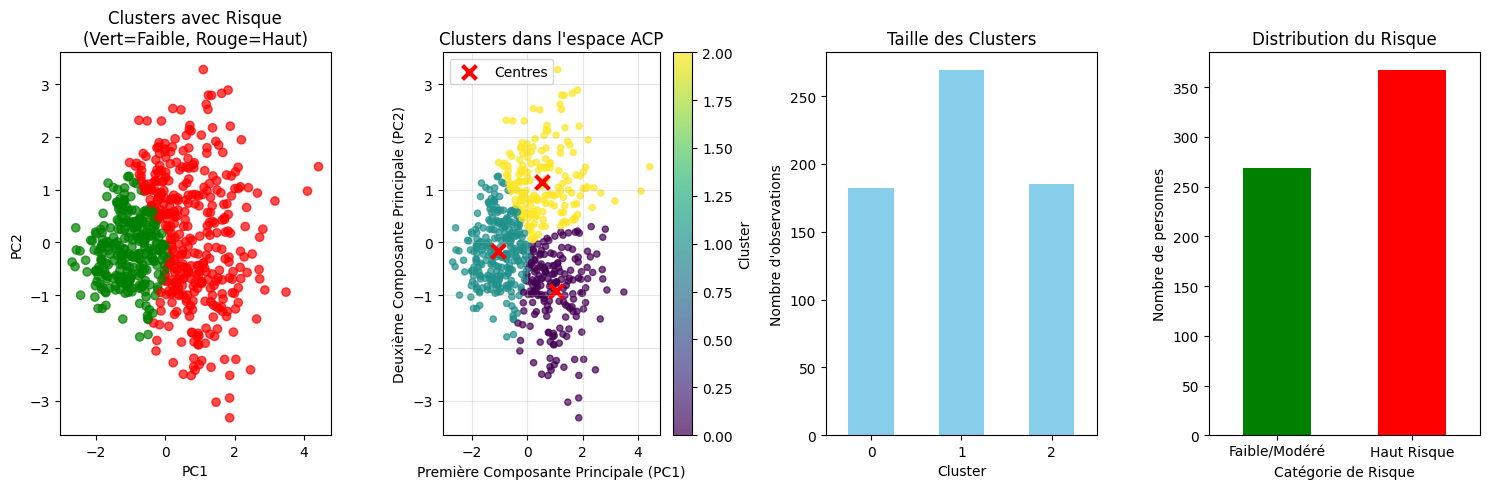

In [ ]:

plt.figure(figsize=(15, 5))

# Graphique 1: Clusters dans l'espace ACP
plt.subplot(1, 4, 1)
colors = ['green' if risk == 0 else 'red' for risk in df['risk_category']]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters avec Risque\n(Vert=Faible, Rouge=Haut)')

# Graphique 2: Clusters sur les composantes principales
plt.subplot(1, 4, 2)

scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.7, s=20)
plt.xlabel('Première Composante Principale (PC1)')
plt.ylabel('Deuxième Composante Principale (PC2)')
plt.title('Clusters dans l\'espace ACP')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)

# Ajouter les centres des clusters
centers = kmeans_pca.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100, linewidths=3, label='Centres')
plt.legend()

# Graphique 3: Distribution des clusters
plt.subplot(1, 4, 3)
cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Nombre d\'observations')
plt.title('Taille des Clusters')
plt.xticks(rotation=0)

# Graphique 4: Distribution du risque
plt.subplot(1, 4, 4)
risk_colors = ['green', 'red']
risk_distribution.plot(kind='bar', color=risk_colors[:len(risk_distribution)])
plt.xlabel('Catégorie de Risque')
plt.ylabel('Nombre de personnes')
plt.title('Distribution du Risque')
plt.xticks([0, 1], ['Faible/Modéré', 'Haut Risque'], rotation=0)

plt.tight_layout()
plt.show()


Création des ensembles X (features) et y (cluster comme label)

In [297]:
# X = features (tu peux choisir PC1/PC2 ou variables originales)
X = df[['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']]  # ou bien : df_pca[['PC1', 'PC2']]

# y = label (cluster)
y = df['Cluster_PCA']


2.Séparer en ensemble d’entraînement et de test

In [298]:
# Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify pour garder même proportion de clusters
)

3. Gérer le déséquilibre avec SMOTE

In [299]:

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Répartition après SMOTE :")
print(pd.Series(y_resampled).value_counts())

Répartition après SMOTE :
Cluster_PCA
1    215
0    215
2    215
Name: count, dtype: int64


2.Définition des modèles


In [300]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM (RBF)": SVC(kernel='rbf', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}


3 Entraînement des modèles et Évaluation


🔹 Modèle : Logistic Regression
✅ Accuracy : 0.95
📊 Rapport de classification :
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        37
           1       0.98      0.91      0.94        54
           2       0.90      0.97      0.94        37

    accuracy                           0.95       128
   macro avg       0.94      0.95      0.95       128
weighted avg       0.95      0.95      0.95       128



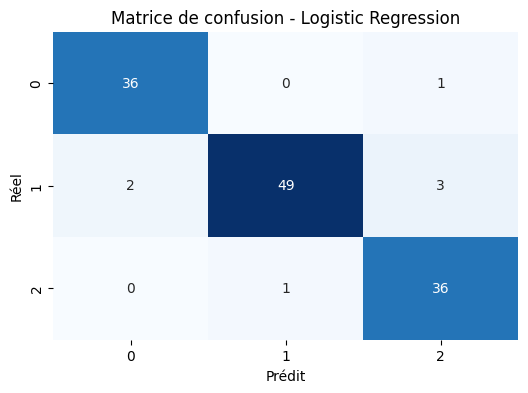


🔹 Modèle : SVM (RBF)
✅ Accuracy : 0.69
📊 Rapport de classification :
              precision    recall  f1-score   support

           0       0.72      0.84      0.78        37
           1       0.82      0.67      0.73        54
           2       0.51      0.57      0.54        37

    accuracy                           0.69       128
   macro avg       0.68      0.69      0.68       128
weighted avg       0.70      0.69      0.69       128



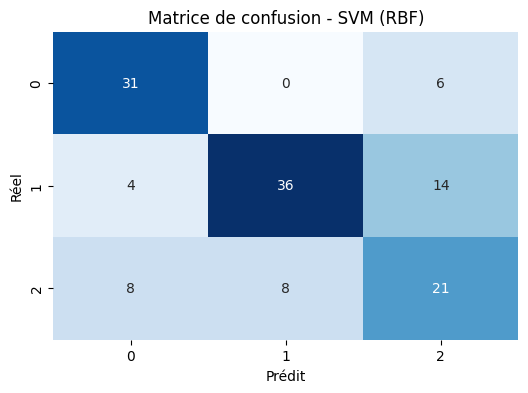


🔹 Modèle : Random Forest
✅ Accuracy : 0.91
📊 Rapport de classification :
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        37
           1       0.94      0.91      0.92        54
           2       0.92      0.95      0.93        37

    accuracy                           0.91       128
   macro avg       0.91      0.92      0.91       128
weighted avg       0.91      0.91      0.91       128



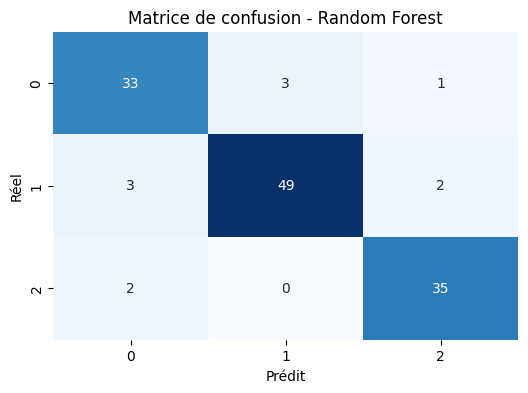


🔹 Modèle : Gradient Boosting
✅ Accuracy : 0.91
📊 Rapport de classification :
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        37
           1       0.96      0.87      0.91        54
           2       0.90      0.95      0.92        37

    accuracy                           0.91       128
   macro avg       0.90      0.91      0.91       128
weighted avg       0.91      0.91      0.91       128



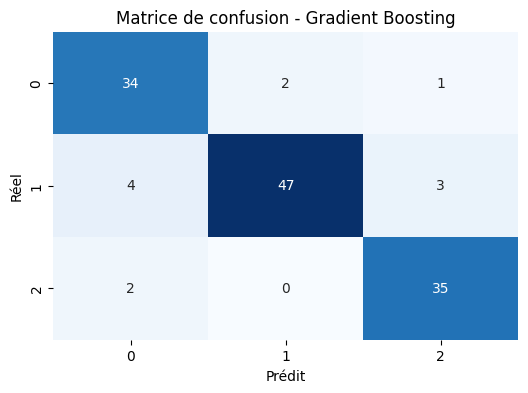

In [301]:
for name, model in models.items():
    print(f"\n🔹 Modèle : {name}")
    
    # Entraînement
    model.fit(X_resampled, y_resampled)
    
    # Prédiction
    y_pred = model.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy : {acc:.2f}")
    
    # Classification report
    print("📊 Rapport de classification :")
    print(classification_report(y_test, y_pred))
    
    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matrice de confusion - {name}')
    plt.xlabel('Prédit')
    plt.ylabel('Réel')
    plt.show()

4.Définir la stratégie de validation croisée


In [302]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

5.Évaluer chaque modèle avec cross_val_score


In [303]:
for name, clf in models.items():
    print(f"\n🔁 Validation croisée - {name}")
    
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', clf)
    ])
    
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1_weighted')  # ou 'accuracy', 'recall_weighted', etc.
    
    print(f"F1-score (pondéré) pour chaque fold : {scores}")
    print(f"✅ Moyenne : {scores.mean():.3f} ± {scores.std():.3f}")


🔁 Validation croisée - Logistic Regression
F1-score (pondéré) pour chaque fold : [0.96877702 0.95310177 0.95297906 0.95288303 0.98426767]
✅ Moyenne : 0.962 ± 0.013

🔁 Validation croisée - SVM (RBF)
F1-score (pondéré) pour chaque fold : [0.80019751 0.76513241 0.74094524 0.7072592  0.72327311]
✅ Moyenne : 0.747 ± 0.033

🔁 Validation croisée - Random Forest
F1-score (pondéré) pour chaque fold : [0.88295603 0.86620187 0.94528479 0.91326607 0.90536972]
✅ Moyenne : 0.903 ± 0.027

🔁 Validation croisée - Gradient Boosting
F1-score (pondéré) pour chaque fold : [0.90625    0.86553895 0.92166539 0.90562984 0.8976378 ]
✅ Moyenne : 0.899 ± 0.019


GridSearchCV sur chaque modèle

In [304]:
# 1. Logistic Regression
pipe_lr = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

param_lr = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l2'],
    'clf__solver': ['lbfgs']
}

grid_lr = GridSearchCV(pipe_lr, param_grid=param_lr, cv=cv, scoring='f1_weighted', n_jobs=-1)
grid_lr.fit(X, y)

print("🔍 Logistic Regression")
print("Meilleurs paramètres :", grid_lr.best_params_)
print("Meilleur F1-score :", grid_lr.best_score_)

# =======================
# 2. Random Forest
# =======================

pipe_rf = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])

param_rf = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(pipe_rf, param_grid=param_rf, cv=cv, scoring='f1_weighted', n_jobs=-1)
grid_rf.fit(X, y)

print("\n🔍 Random Forest")
print("Meilleurs paramètres :", grid_rf.best_params_)
print("Meilleur F1-score :", grid_rf.best_score_)

# =======================
# 3. Gradient Boosting
# =======================

pipe_gb = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', GradientBoostingClassifier(random_state=42))
])

param_gb = {
    'clf__n_estimators': [100, 150],
    'clf__learning_rate': [0.05, 0.1],
    'clf__max_depth': [3, 5]
}

grid_gb = GridSearchCV(pipe_gb, param_grid=param_gb, cv=cv, scoring='f1_weighted', n_jobs=-1)
grid_gb.fit(X, y)

print("\n🔍 Gradient Boosting")
print("Meilleurs paramètres :", grid_gb.best_params_)
print("Meilleur F1-score :", grid_gb.best_score_)

# =======================
# 4. SVM
# =======================

pipe_svm = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', SVC())
])

param_svm = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['rbf', 'linear'],
    'clf__gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(pipe_svm, param_grid=param_svm, cv=cv, scoring='f1_weighted', n_jobs=-1)
grid_svm.fit(X, y)

print("\n🔍 SVM")
print("Meilleurs paramètres :", grid_svm.best_params_)
print("Meilleur F1-score :", grid_svm.best_score_)

🔍 Logistic Regression
Meilleurs paramètres : {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Meilleur F1-score : 0.9811570369482236

🔍 Random Forest
Meilleurs paramètres : {'clf__max_depth': 10, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}
Meilleur F1-score : 0.9074035407505852

🔍 Gradient Boosting
Meilleurs paramètres : {'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__n_estimators': 150}
Meilleur F1-score : 0.907437037731874

🔍 SVM
Meilleurs paramètres : {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'linear'}
Meilleur F1-score : 0.976377692941328


Comparaison des scores et sélection du meilleur modèle

In [305]:
# Stocker les résultats de GridSearchCV
results = {
    "Logistic Regression": {
        "model": grid_lr.best_estimator_,
        "f1_score": grid_lr.best_score_,
        "params": grid_lr.best_params_
    },
    "Random Forest": {
        "model": grid_rf.best_estimator_,
        "f1_score": grid_rf.best_score_,
        "params": grid_rf.best_params_
    },
    "Gradient Boosting": {
        "model": grid_gb.best_estimator_,
        "f1_score": grid_gb.best_score_,
        "params": grid_gb.best_params_
    },
    "SVM": {
        "model": grid_svm.best_estimator_,
        "f1_score": grid_svm.best_score_,
        "params": grid_svm.best_params_
    }
}

# Affichage formaté des scores
print("\n📊 Comparaison des F1-scores pondérés :")
for name, data in results.items():
    print(f"{name}: F1-score = {data['f1_score']:.4f} | Paramètres = {data['params']}")

# Sélection du meilleur modèle
best_model_name = max(results, key=lambda k: results[k]['f1_score'])
best_model = results[best_model_name]['model']
best_score = results[best_model_name]['f1_score']

print(f"\n🏆 Meilleur modèle : {best_model_name}")
print(f"✅ F1-score pondéré : {best_score:.4f}")



📊 Comparaison des F1-scores pondérés :
Logistic Regression: F1-score = 0.9812 | Paramètres = {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Random Forest: F1-score = 0.9074 | Paramètres = {'clf__max_depth': 10, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}
Gradient Boosting: F1-score = 0.9074 | Paramètres = {'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__n_estimators': 150}
SVM: F1-score = 0.9764 | Paramètres = {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'linear'}

🏆 Meilleur modèle : Logistic Regression
✅ F1-score pondéré : 0.9812


Enregistrement du meilleur modèle

In [306]:
# Sauvegarder dans un fichier .pkl
joblib.dump(best_model, f"{best_model_name.replace(' ', '_').lower()}_best_model.pkl")
print(f"💾 Modèle enregistré : {best_model_name.replace(' ', '_').lower()}_best_model.pkl")

💾 Modèle enregistré : logistic_regression_best_model.pkl
